In [ ]:
!git clone https://github.com/YousefGh/kmeans-feature-importance.git

Cloning into 'kmeans-feature-importance'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 108 (delta 40), reused 86 (delta 21), pack-reused 0
Receiving objects: 100% (108/108), 2.83 MiB | 19.55 MiB/s, done.
Resolving deltas: 100% (40/40), done.


In [ ]:
!pip install --upgrade kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
import seaborn as sns
import numpy as np
import re
import scipy.stats as st
from sklearn.utils import resample
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
from collections import defaultdict
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from kmeans_feature_imp import KMeansInterp
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


In [ ]:
clusterization_dict = {}

In [ ]:
df  = pd.read_excel("DiplomaDS_NHL16-23.xlsx")



In [ ]:
a= df[['PLAYER','FORWARD', 'AGE', 'TYPE', 'EXTENSION',  'ARB. ELIG 2', 'ARB. REQ', 'CLAUSE', 'LENGTH', 'SIGNING', 'EXPIRY', 'SIGNINGB', 'PERFB', 'CAP HIT','AGE', 'FORWARD', 'GP', 'G', 'A', 'P', '+/-', 'Sh', 'TOI','BLK', 'HIT','iCF', 'PIM']]

In [ ]:
a

,PLAYER,FORWARD,AGE,TYPE,EXTENSION,ARB. ELIG 2,ARB. REQ,CLAUSE,LENGTH,SIGNING,...,G,A,P,+/-,Sh,TOI,BLK,HIT,iCF,PIM
0,Connor McDavid,1,25.00,0,1,0,0,4,8,0,...,64,89,153,22,352,1836,40,89,495,36
1,Artemi Panarin,1,30.00,0,0,0,0,4,7,1,...,29,63,92,4,204,1608,11,26,402,36
2,Auston Matthews,1,24.00,0,1,0,0,0,5,0,...,40,45,85,31,327,1501,92,78,526,20
3,John Tavares,1,31.00,0,0,0,0,4,7,1,...,36,44,80,-7,277,1413,36,112,428,34
4,Mitchell Marner,1,25.00,0,0,0,0,0,6,0,...,30,69,99,18,196,1702,45,53,372,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5789,Rob O'Gara,0,22.00,3,0,0,0,0,2,2,...,0,0,0,1,2,48,7,3,3,0
5790,Tim Heed,0,25.00,2,1,0,0,0,1,1,...,0,0,0,0,1,16,2,0,4,0
5791,Anton Lindholm,0,21.00,3,0,0,0,0,3,2,...,0,0,0,-8,7,177,12,38,22,2
5792,Erik Burgdoerfer,0,27.00,2,0,0,0,0,1,1,...,0,0,0,-1,2,22,0,5,3,0


In [ ]:
df # выводим первые 5 строк


,PLAYER,FORWARD,AGE,DATE OF BIRTH,COUNTRY,WEIGHT,HEIGHT,POS,HANDED,DRAFTED,...,SIGNINGB,PERFB,PIM,TOI,BLK,HIT,FOW,FOL,POSITION,SEASON
0,Connor McDavid,1,25,"Jan. 13, 1997",Canada,88,185,C,Left,1 - Round 1 - 2015 (EDM),...,1,0,36,1836,40,89,525,486,1,22
1,Artemi Panarin,1,30,"Oct. 30, 1991",Russia,77,180,LW,Right,-,...,1,0,36,1608,11,26,6,13,2,22
2,Auston Matthews,1,24,"Sep. 17, 1997",United States,100,191,C,Left,1 - Round 1 - 2016 (TOR),...,1,0,20,1501,92,78,550,499,1,22
3,John Tavares,1,31,"Sep. 20, 1990",Canada,98,185,"C, LW",Left,1 - Round 1 - 2009 (NYI),...,1,0,34,1413,36,112,726,519,1,22
4,Mitchell Marner,1,25,"May 5, 1997",Canada,79,183,RW,Right,4 - Round 1 - 2015 (TOR),...,1,0,28,1702,45,53,0,4,2,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5789,Rob O'Gara,0,22,"Jul. 6, 1993",United States,94,193,LD,Left,151 - Round 5 - 2011 (BOS),...,1,0,0,48,7,3,0,0,0,16
5790,Tim Heed,0,25,"Jan. 27, 1991",Sweden,82,180,RD,Right,132 - Round 5 - 2010 (ANA),...,1,0,0,16,2,0,0,0,0,16
5791,Anton Lindholm,0,21,"Nov. 29, 1994",Sweden,87,180,LD,Left,144 - Round 5 - 2014 (COL),...,1,1,2,177,12,38,0,0,0,16
5792,Erik Burgdoerfer,0,27,"Dec. 11, 1988",United States,94,185,RD,Right,-,...,0,0,0,22,0,5,0,0,0,16


In [ ]:
df["TOI(min)"] = df["TOI(min)"].apply(lambda x: str(x).replace(":",".")).astype(float)

In [ ]:
df["AGE"] = df["AGE"].apply(lambda x: str(x).replace("Deceased","").strip().replace("(","").replace(")","")).astype(float)

<Axes: >

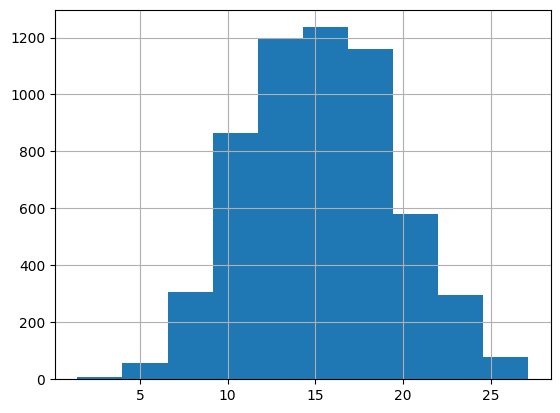

In [ ]:
df["TOI(min)"].hist()

<Axes: >

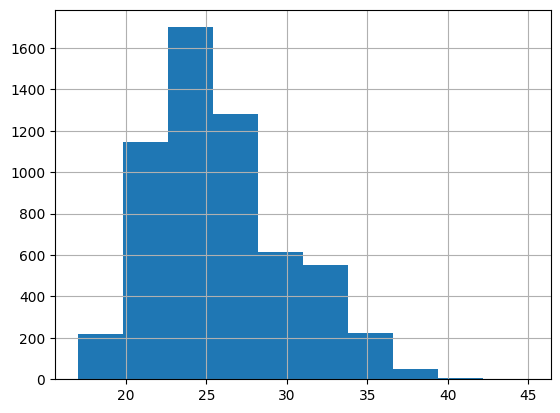

In [ ]:
df["AGE"].hist()

In [ ]:
df_processed = df.copy() # создаем копию датасета

In [ ]:
df_processed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5794 entries, 0 to 5793
Data columns (total 71 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PLAYER          5794 non-null   object 
 1   FORWARD         5794 non-null   int64  
 2   AGE             5794 non-null   float64
 3   DATE OF BIRTH   5794 non-null   object 
 4   COUNTRY         5794 non-null   object 
 5   WEIGHT          5794 non-null   int64  
 6   HEIGHT          5794 non-null   int64  
 7   POS             5794 non-null   object 
 8   HANDED          5794 non-null   object 
 9   DRAFTED         5794 non-null   object 
 10  SLIDE CAND.     5794 non-null   int64  
 11  WAIVERS EXEMPT  5794 non-null   int64  
 12  ARB. ELIG 1     5794 non-null   int64  
 13  GP              5794 non-null   int64  
 14  G               5794 non-null   int64  
 15  A               5794 non-null   int64  
 16  P               5794 non-null   int64  
 17  P/GP            5794 non-null   f

In [ ]:
df_processed.describe(include='number').T


,count,mean,std,min,25%,50%,75%,max
FORWARD,5794.0,0.649465,0.477179,0.0,0.0,1.0,1.0,1.0
AGE,5794.0,25.771833,4.175553,17.0,23.0,25.0,28.0,45.0
WEIGHT,5794.0,90.109769,6.932888,64.0,85.0,90.0,95.0,120.0
HEIGHT,5794.0,185.550742,5.491886,165.0,183.0,185.0,188.0,206.0
SLIDE CAND.,5794.0,0.000173,0.013137,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
HIT,5794.0,60.968761,53.048163,0.0,20.0,49.0,88.0,364.0
FOW,5794.0,81.646703,177.230570,0.0,0.0,2.0,40.0,1273.0
FOL,5794.0,81.474629,165.031371,0.0,0.0,4.0,50.0,935.0
POSITION,5794.0,1.057128,0.868945,0.0,0.0,1.0,2.0,2.0


In [ ]:
df_processed.describe(include='object').T


,count,unique,top,freq
PLAYER,5794,1499,Sebastian Aho,15
DATE OF BIRTH,5794,1295,"Jan. 5, 1994",19
COUNTRY,5794,25,Canada,2563
POS,5794,22,RD,817
HANDED,5794,2,Left,3601
DRAFTED,5794,1222,-,842
SIGNING DATE,5794,1326,"Jul. 1, 2016",171


In [ ]:
def extract_age(deceased_str):
    # Remove the word "Deceased" from the string
    age_str = deceased_str.replace("Deceased", "").strip().replace("(", "").replace(")", "")

    # Convert the remaining string to an integer
    age = int(age_str)
    return age


In [ ]:
# df_processed['AGE'] = df_processed['AGE'].apply(lambda x: extract_age(str(x)))

In [ ]:
# df_processed['AGE'].value_counts()

In [ ]:
for type in np.unique(list(df.dtypes)):
    print("Количество переменных типа {}: {}".format(type, len(df.columns[df.dtypes == type])))


Количество переменных типа int64: 42
Количество переменных типа float64: 22
Количество переменных типа object: 7


# EDA и Кластеризация по контрактам

In [ ]:
#rename columns
df_processed.rename(columns={'ARB. ELIG ':'ARB. ELIG 1',
                             'ARB. ELIG': 'ARB. ELIG 2'}, inplace=True)

In [ ]:
selected_columns = ['FORWARD', 'AGE', 'TYPE', 'EXTENSION',  'ARB. ELIG 2', 'ARB. REQ', 'CLAUSE', 'LENGTH', 'SIGNING', 'EXPIRY', 'SIGNINGB', 'PERFB', 'CAP HIT']

In [ ]:
def separate_columns(df_processed=None, selected_columns=None):
    binary_columns = []
    non_binary_columns = []
    for col in selected_columns:
        if len(df_processed[col].unique()) == 2:
            binary_columns.append(col)
        else:
            non_binary_columns.append(col)
    return binary_columns, non_binary_columns



In [ ]:
binary_columns, non_binary_columns = separate_columns(df_processed, selected_columns)

In [ ]:
clusterization_dict['contract_clustering'] = [binary_columns, non_binary_columns]

In [ ]:
clusterization_dict

{'contract_clustering': [['FORWARD',
   'EXTENSION',
   'ARB. ELIG 2',
   'ARB. REQ',
   'SIGNINGB',
   'PERFB'],
  ['AGE', 'TYPE', 'CLAUSE', 'LENGTH', 'SIGNING', 'EXPIRY', 'CAP HIT']]}

In [ ]:
def plot_numeric_distributions(df_processed=None, selected_columns=None):
    num_cols = df_processed[selected_columns].select_dtypes(include=['number']).columns
    num_cols_count = len(num_cols)
    col_num = 3
    row_num = num_cols_count // col_num + (num_cols_count % col_num > 0)
    fig, axes = plt.subplots(row_num, col_num, figsize=(40, 40))
    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        sns.distplot(df_processed[col], ax=axes[i])
        if df_processed[col].skew() > 0:
            axes[i].set_title(f'{col} - right skewed')
        elif df_processed[col].skew() < 0:
            axes[i].set_title(f'{col} - left skewed')
        else:
            axes[i].set_title(f'{col} - normal distribution')

    plt.show()

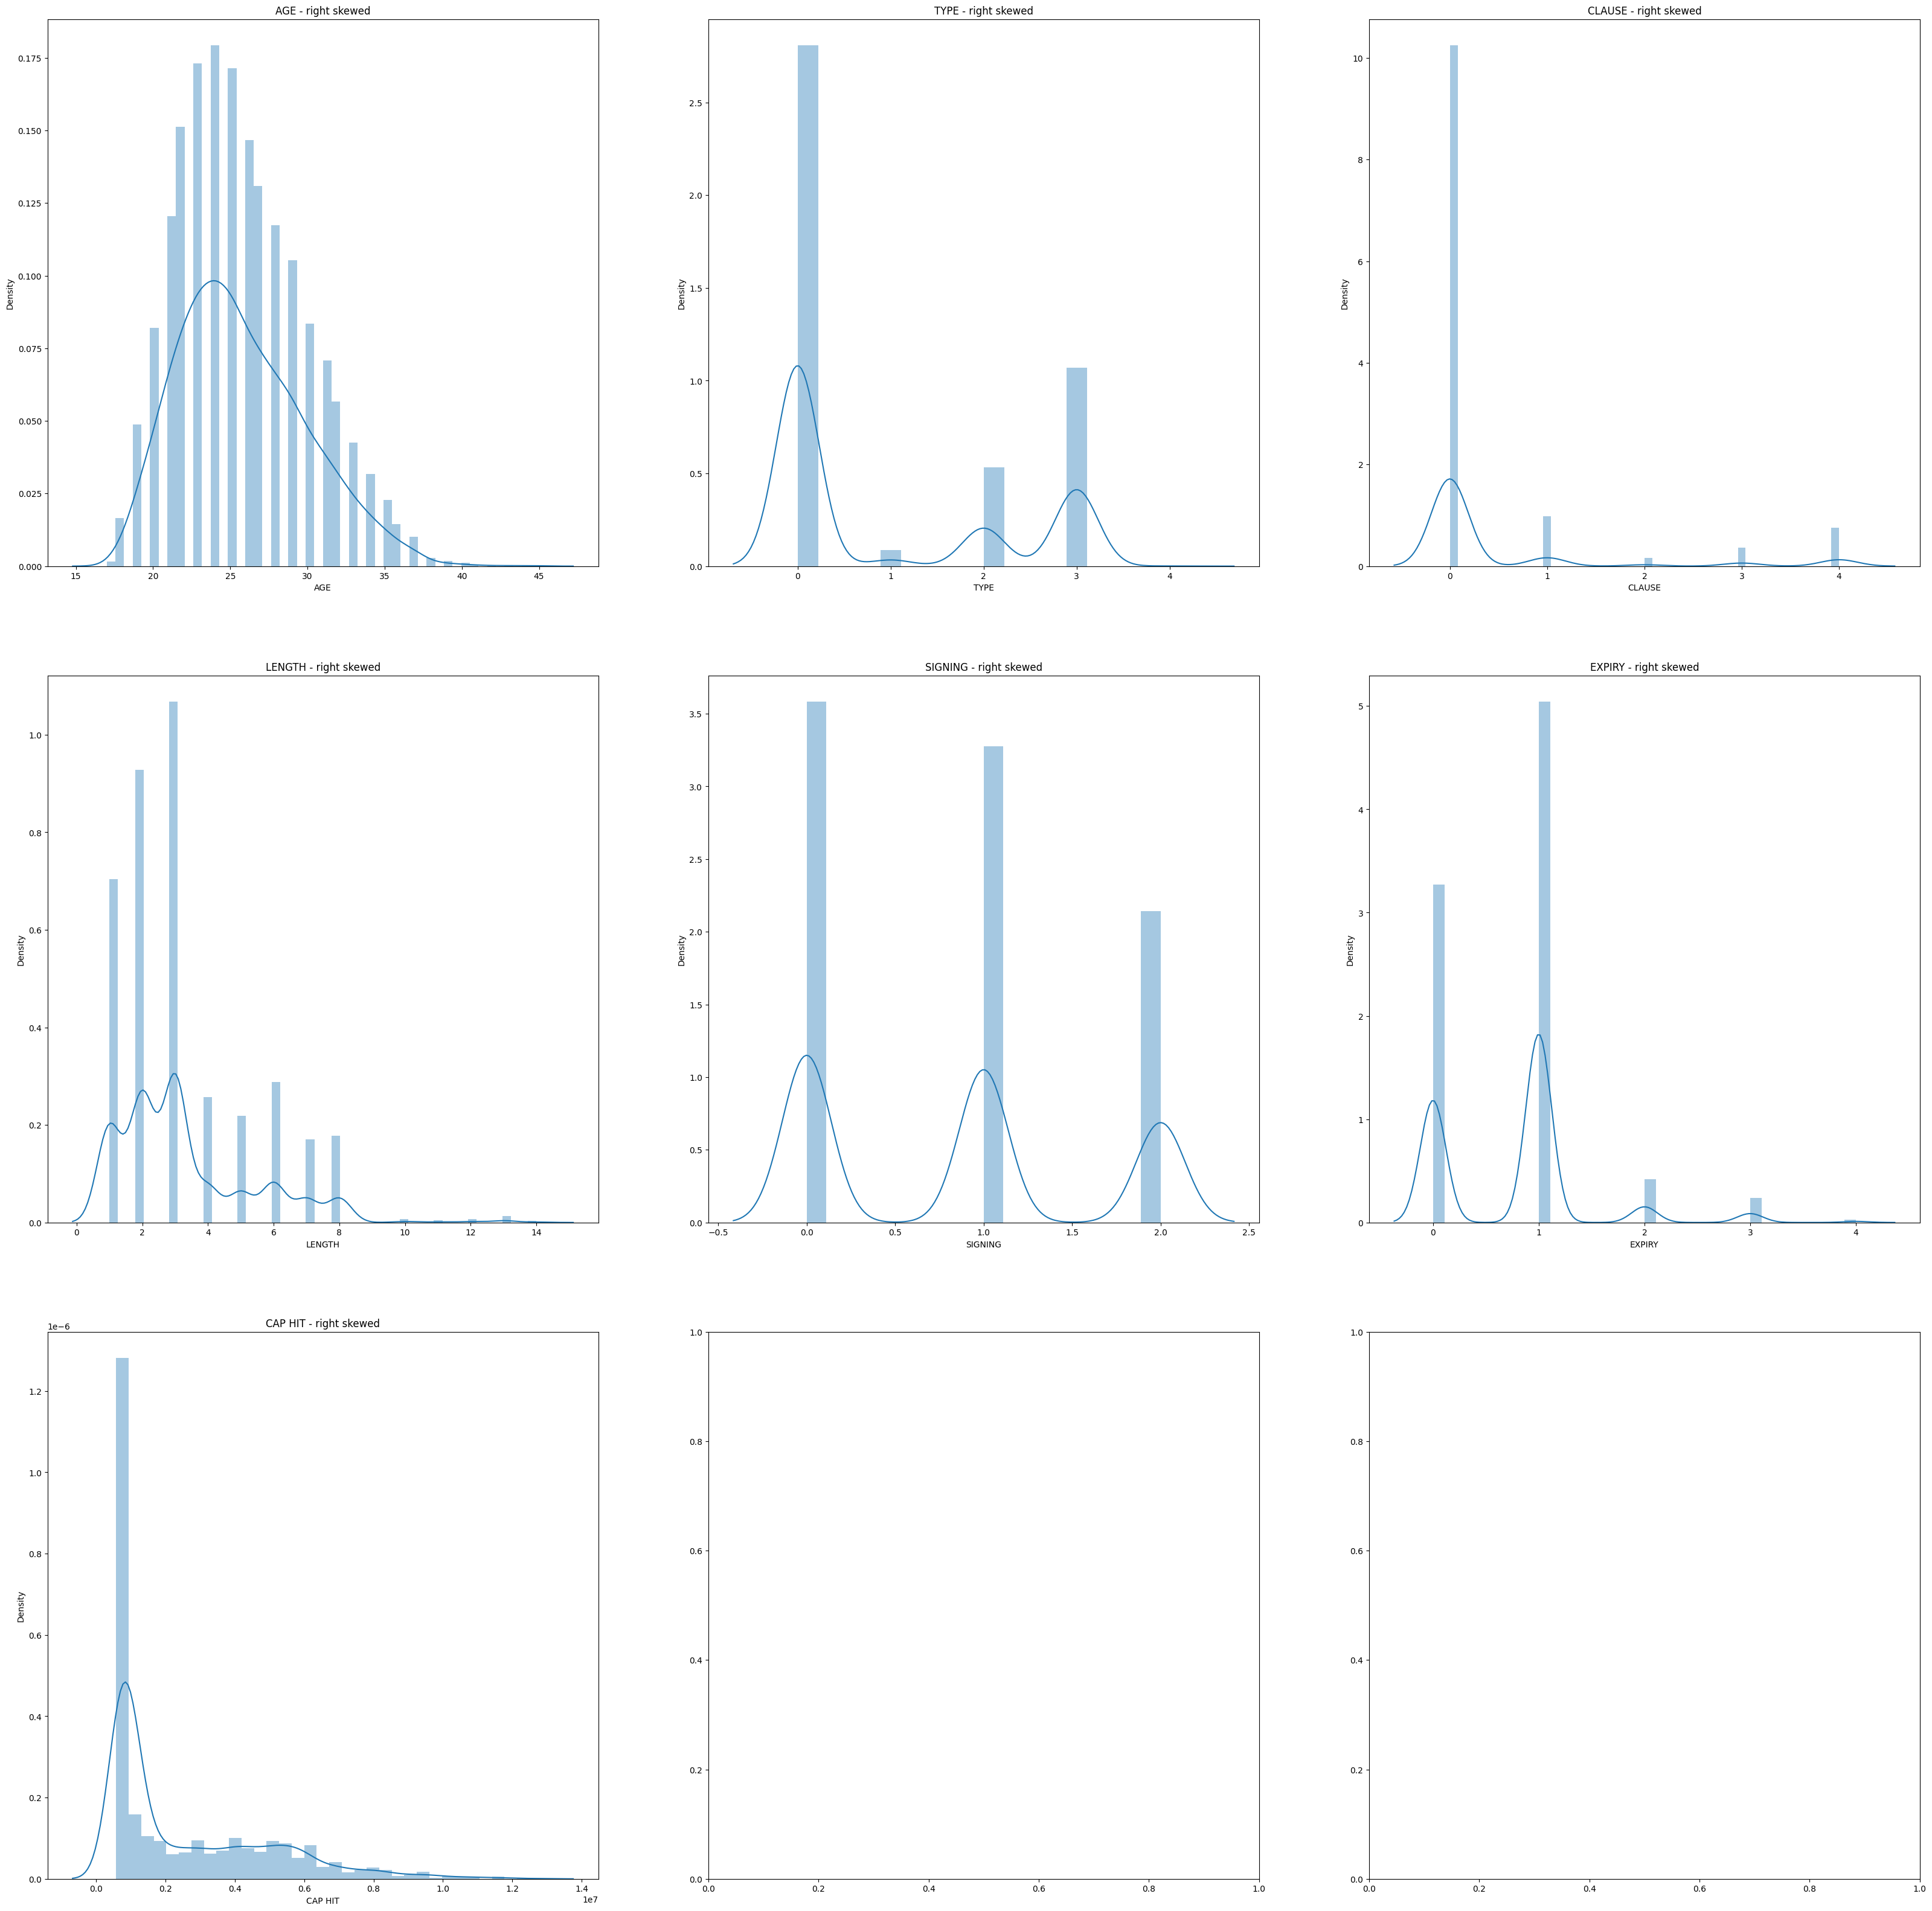

In [ ]:
plot_numeric_distributions(df_processed, non_binary_columns)

In [ ]:
def plot_binary_distributions(df_processed=None, selected_columns=None):
    num_cols = df_processed[selected_columns].select_dtypes(include=['number']).columns
    num_cols_count = len(num_cols)
    col_num = 3
    row_num = num_cols_count // col_num + (num_cols_count % col_num > 0)
    fig, axes = plt.subplots(row_num, col_num, figsize=(40, 40))
    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        data = df_processed[col].value_counts()
        sns.barplot(x=data.index, y=data, ax=axes[i])
        axes[i].set_title(f'{col}')

    plt.show()

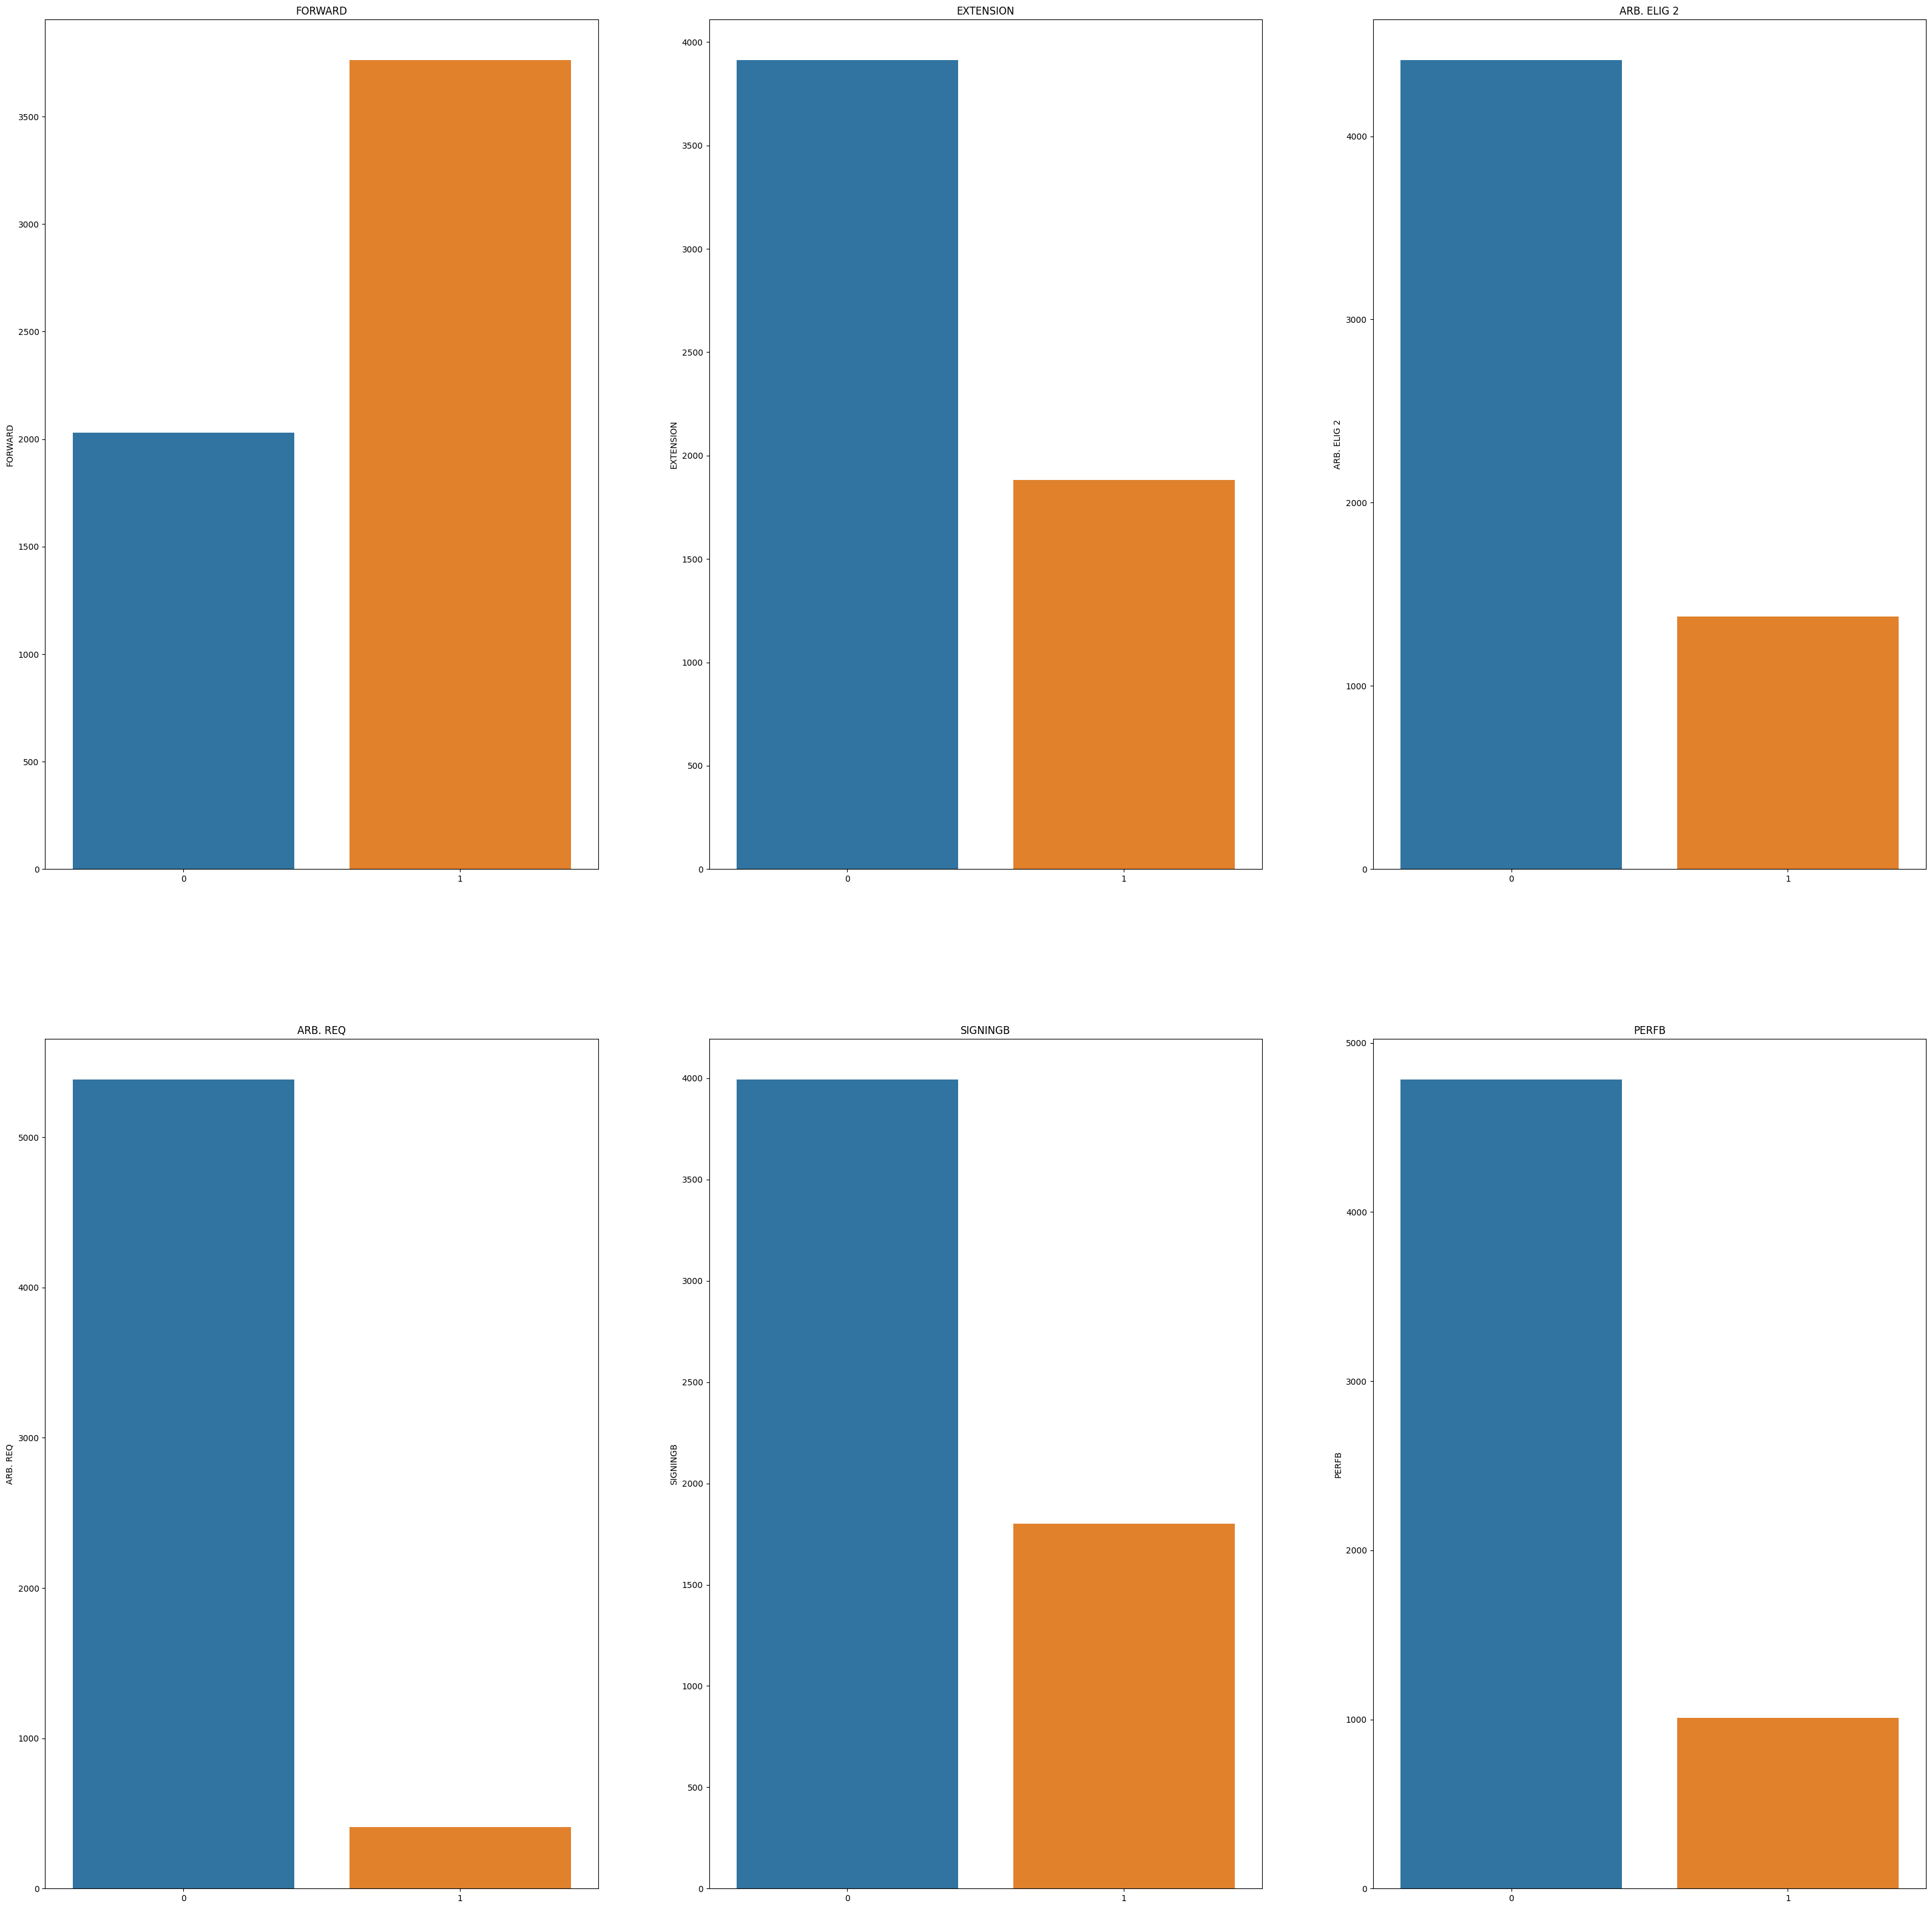

In [ ]:
plot_binary_distributions(df_processed, binary_columns)

In [ ]:
#количество пропусков в датасете
def get_missing_values(df=None):
    missing_values = df.isnull().sum()
    missing_values = pd.DataFrame(missing_values)
    mapping = {missing_values.columns[0]:'Count'}
    missing_values = missing_values.rename(columns=mapping)
    missing_values['Percent'] = missing_values['Count'] / len(df) * 100
    missing_values['Percent'] = missing_values['Percent'].apply(lambda x: str(round(x,2))+"%")
    return missing_values


In [ ]:
temp = get_missing_values(df_processed[non_binary_columns+binary_columns])
temp['Percent'].to_frame().style.set_properties(subset=['Percent'], **{'width': '1000px'})


,Percent
AGE,0.0%
TYPE,0.0%
CLAUSE,0.0%
LENGTH,0.0%
SIGNING,0.0%
EXPIRY,0.0%
CAP HIT,0.0%
FORWARD,0.0%
EXTENSION,0.0%
ARB. ELIG 2,0.0%


In [ ]:
#нет пропусков в данных

In [ ]:
# Data Processing

In [ ]:
# # Критерии выбора столбцов, такие как:
# - Все строки пустые.
# - Отсутствует более 50% информации.
# - Наличие только одного значения - такие данные не вносят никакого вклада в анализ.


In [ ]:
def preprocess_data(df=None, selected_columns=None):
    df_processed = df[selected_columns].dropna(axis=1, how='all')
    df_processed = df_processed.dropna(axis=1, thresh=0.5*len(df))
    df_processed = df_processed.loc[:, df_processed.apply(pd.Series.nunique) != 1]
    return df_processed



In [ ]:
df_processed = preprocess_data(df_processed, non_binary_columns+binary_columns)

In [ ]:
df_processed

,AGE,TYPE,CLAUSE,LENGTH,SIGNING,EXPIRY,CAP HIT,FORWARD,EXTENSION,ARB. ELIG 2,ARB. REQ,SIGNINGB,PERFB
0,25.0,0,4,8,0,1,12500000,1,1,0,0,1,0
1,30.0,0,4,7,1,1,11642857,1,0,0,0,1,0
2,24.0,0,0,5,0,1,11640250,1,1,0,0,1,0
3,31.0,0,4,7,1,1,11000000,1,0,0,0,1,0
4,25.0,0,0,6,0,1,10903000,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5789,22.0,3,0,2,2,0,925000,0,0,0,0,1,0
5790,25.0,2,0,1,1,0,775000,0,1,0,0,1,0
5791,21.0,3,0,3,2,0,717500,0,0,0,0,1,1
5792,27.0,2,0,1,1,1,575000,0,0,0,0,0,0


In [ ]:
#данные сокращены до 3 стандартных отклонений

In [ ]:
def cut_data(data, col):
    mean = data[col].mean()
    std = data[col].std()

    data[col] = data[col].apply(lambda x: mean if x > mean + 3 * std else x)
    data[col] = data[col].apply(lambda x: mean if x < mean - 3 * std else x)

    return data


In [ ]:
for col in df_processed.select_dtypes(include=['number']).columns:
    df_processed_cutted = cut_data(df_processed, col)


In [ ]:
df_processed_cutted

,AGE,TYPE,CLAUSE,LENGTH,SIGNING,EXPIRY,CAP HIT,FORWARD,EXTENSION,ARB. ELIG 2,ARB. REQ,SIGNINGB,PERFB
0,25.0,0,0.429928,8.0,0,1.0,2.575650e+06,1,1,0,0.0,1,0
1,30.0,0,0.429928,7.0,1,1.0,2.575650e+06,1,0,0,0.0,1,0
2,24.0,0,0.000000,5.0,0,1.0,2.575650e+06,1,1,0,0.0,1,0
3,31.0,0,0.429928,7.0,1,1.0,2.575650e+06,1,0,0,0.0,1,0
4,25.0,0,0.000000,6.0,0,1.0,2.575650e+06,1,0,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5789,22.0,3,0.000000,2.0,2,0.0,9.250000e+05,0,0,0,0.0,1,0
5790,25.0,2,0.000000,1.0,1,0.0,7.750000e+05,0,1,0,0.0,1,0
5791,21.0,3,0.000000,3.0,2,0.0,7.175000e+05,0,0,0,0.0,1,1
5792,27.0,2,0.000000,1.0,1,1.0,5.750000e+05,0,0,0,0.0,0,0


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from kneed import KneeLocator

def clustering_metrics_kmeans(X, columns, max_number_cluster=10, title="Clustering Metrics"):
    ss = StandardScaler(with_std=False)
    sdf = ss.fit_transform(X)
    distortions = [] # sse
    ch_scores = []
    db_scores = []
    sil_scores = []
    for i in range(2, max_number_cluster):
        km = KMeans(
            n_clusters=i, init='random',
            n_init=10, max_iter=300,
            tol=1e-04, random_state=0
        )
        km.fit(sdf)
        distortions.append(km.inertia_)
        ch_scores.append(calinski_harabasz_score(sdf, km.labels_))
        db_scores.append(davies_bouldin_score(sdf, km.labels_))
        sil_scores.append(silhouette_score(sdf, km.labels_))
    kn = KneeLocator(range(2, max_number_cluster), distortions, curve='convex', direction='decreasing')
    k = kn.knee
    print('Optimal number of clusters: %d' % k)
    plt.plot(range(2, max_number_cluster), distortions, marker='o')
    plt.title(title)
    plt.vlines(k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()
    df = pd.DataFrame({
        'Number of Clusters': range(2, max_number_cluster),
        'Distortion': distortions,
        'Calinski-Harabasz Score': ch_scores,
        'Davies-Bouldin Score': db_scores,
        'Silhouette Score': sil_scores
    })
    return df, k


Optimal number of clusters: 4


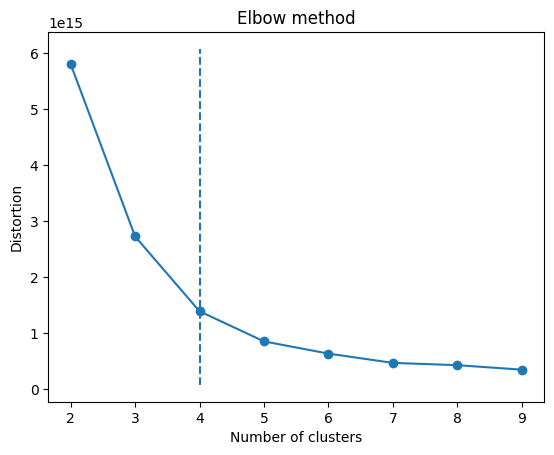

In [ ]:
X = df_processed_cutted.copy()
clusterization_dict['X_processed_scenario'] = df_processed_cutted.copy()
cluster_df, k = clustering_metrics_kmeans(X, X.columns, max_number_cluster=10, title="Elbow method")


In [ ]:
cluster_df

,Number of Clusters,Distortion,Calinski-Harabasz Score,Davies-Bouldin Score,Silhouette Score
0,2,5.800954e+15,22454.250918,0.399688,0.745552
1,3,2.722818e+15,27188.570582,0.512735,0.716556
2,4,1.386667e+15,37444.649874,0.459728,0.725360
3,5,8.488219e+14,46787.348129,0.458358,0.716747
4,6,6.305512e+14,50778.558001,0.480923,0.691743
5,7,4.646620e+14,57756.942379,0.499182,0.691729
6,8,4.239724e+14,54327.108029,0.526490,0.581409
7,9,3.437101e+14,58795.479566,0.537339,0.585200


Показатель Калинского-Харабаша: Показатель Калинского-Харабаша варьируется от нуля до бесконечности, где более высокий показатель указывает на более четкие кластеры. Однако этот показатель не нормирован, то есть он чувствителен к количеству кластеров и размеру набора данных.

Показатель Дэвиса-Болдина: Показатель Дэвиса-Болдина варьируется от нуля до бесконечности, где более низкий показатель указывает на более четкие кластеры. Нулевой балл указывает на идеально разделенные кластеры, а по мере того, как кластеры становятся более похожими, балл увеличивается.

Оценка силуэта: Силуэтный балл варьируется от -1 до 1, где более высокий балл указывает на более четкие кластеры. Оценка 1 означает, что точка данных хорошо сопоставлена со своим кластером и плохо сопоставлена с соседними кластерами. Оценка -1 указывает на то, что точка данных плохо соответствует своему кластеру и хорошо соответствует соседним кластерам. Оценка 0 означает, что точка данных одинаково похожа как на свой кластер, так и на соседние кластеры.

In [ ]:
# kmeans
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
df_processed_cutted['cluster'] = kmeans.labels_


<Axes: title={'center': 'Cluster distribution'}, xlabel='cluster', ylabel='count'>

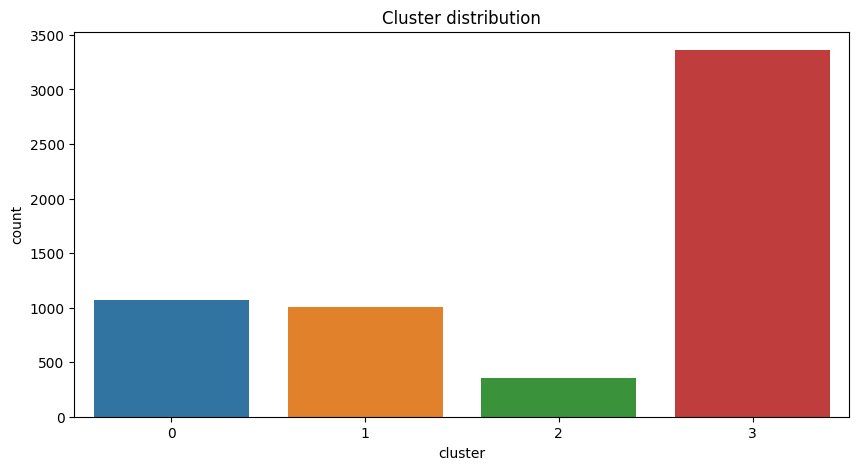

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Cluster distribution')
sns.countplot(x='cluster', data=df_processed_cutted)


In [ ]:
kms = KMeansInterp(
    n_clusters=k,
    ordered_feature_names=X.columns,
    feature_importance_method='unsup2sup')

In [ ]:
kms.fit(X)

KMeansInterp(feature_importance_method='unsup2sup',
             ordered_feature_names=Index(['AGE', 'TYPE', 'CLAUSE', 'LENGTH', 'SIGNING', 'EXPIRY', 'CAP HIT',
       'FORWARD', 'EXTENSION', 'ARB. ELIG 2', 'ARB. REQ', 'SIGNINGB', 'PERFB'],
      dtype='object'))

In [ ]:
km_importances = pd.DataFrame(kms.feature_importances_)

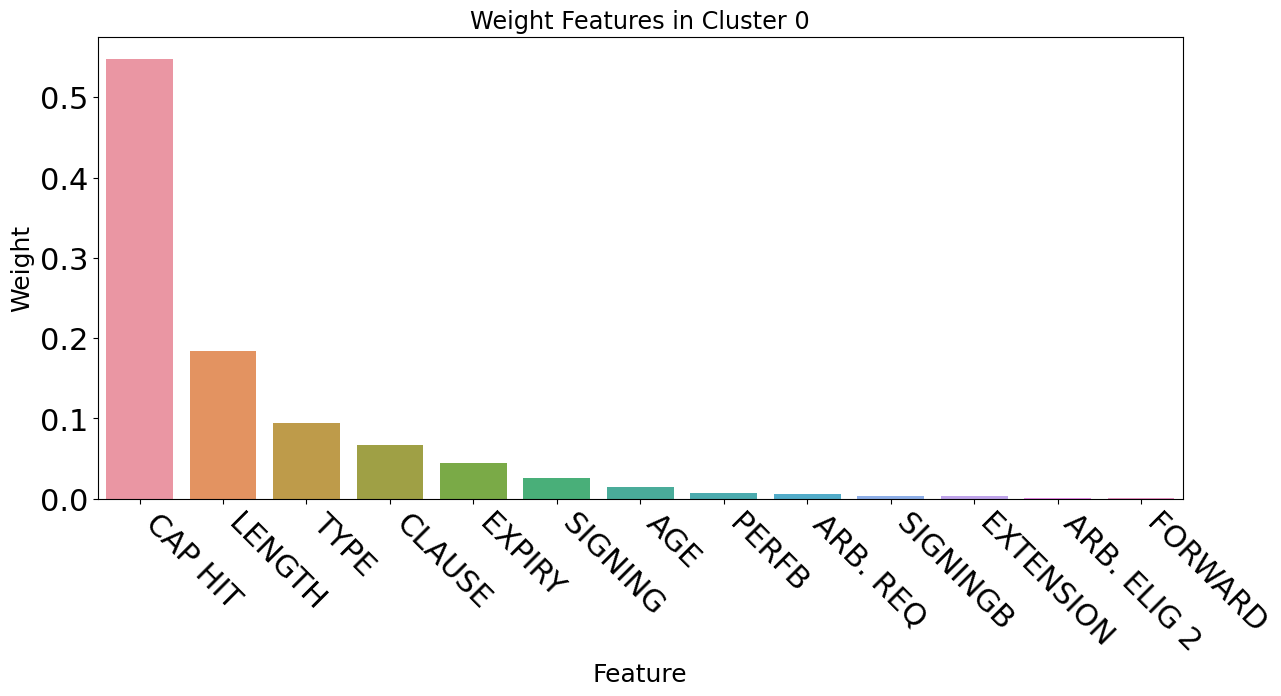

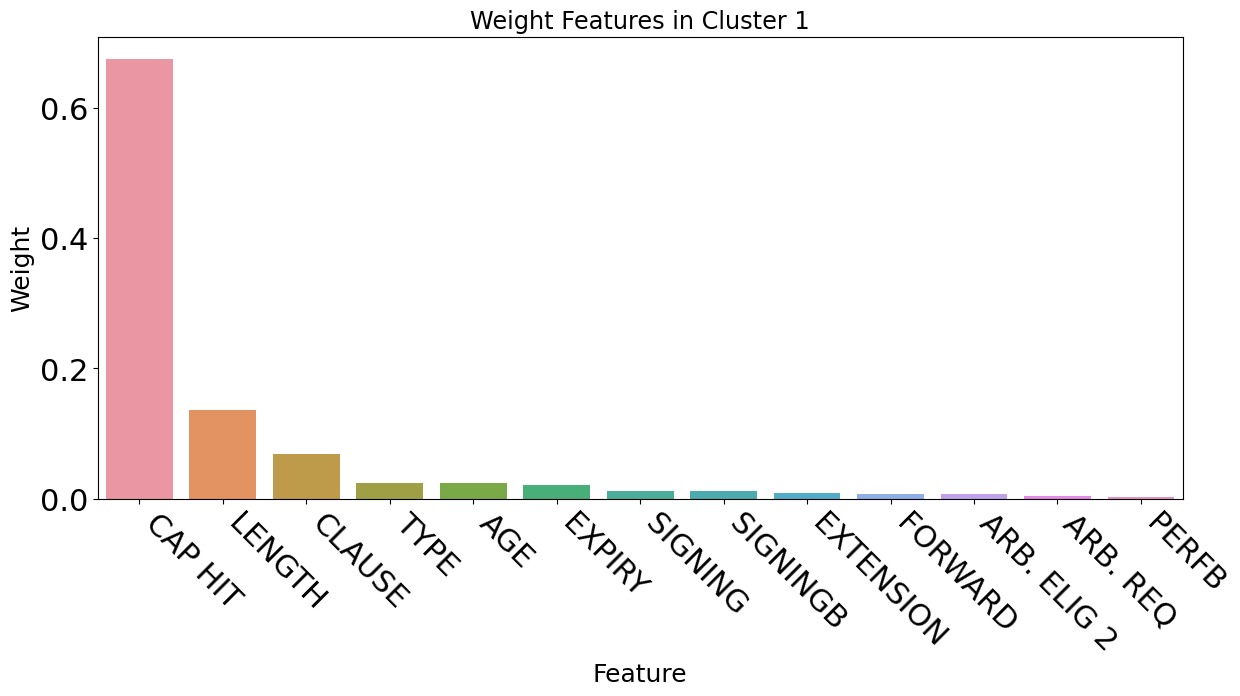

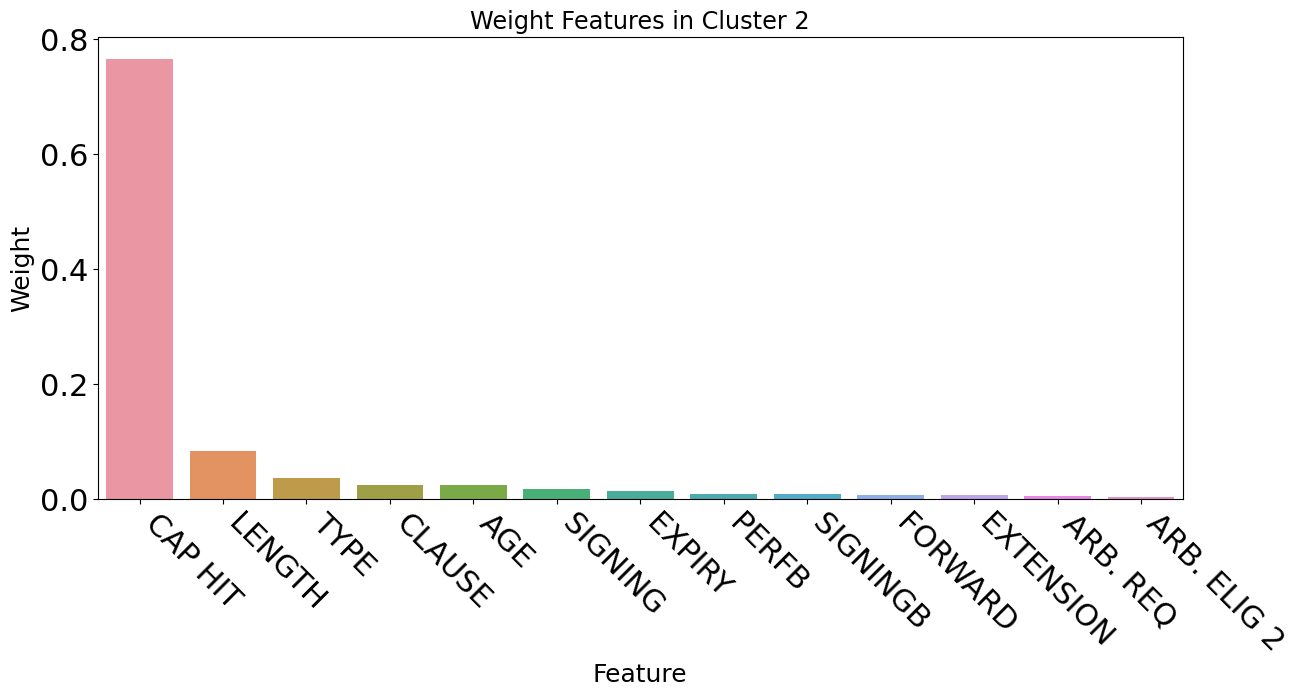

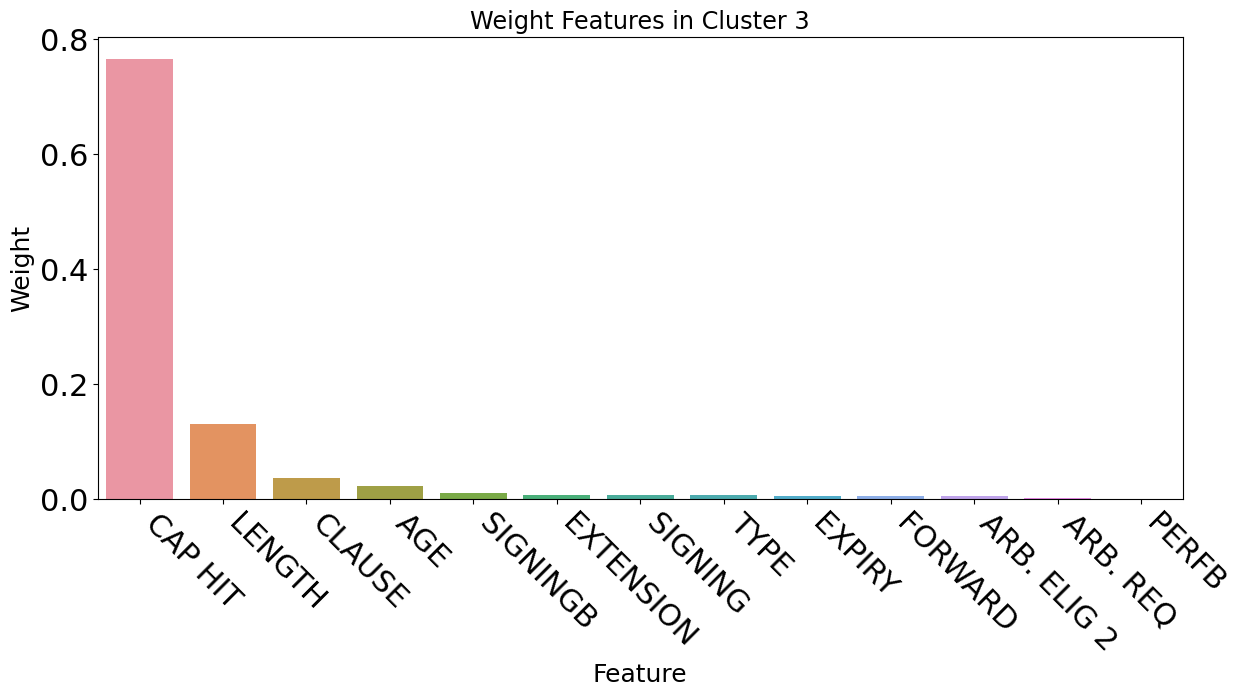

In [ ]:
for cluster_label, feature_weights in kms.feature_importances_.items():    
    df_feature_weight = pd.DataFrame(feature_weights[:15], columns=["Feature", "Weight"])
    fig, ax = plt.subplots(figsize=(14,6))
    sns.barplot(x="Feature", y="Weight", data=df_feature_weight)
    plt.xticks(rotation=-45, ha="left");
    ax.tick_params(axis='both', which='major', labelsize=22)
    plt.title(f'Weight Features in Cluster {cluster_label}', fontsize='xx-large')
    plt.xlabel('Feature', fontsize=18)
    plt.ylabel('Weight', fontsize=18)

    plt.show();

In [ ]:
km_importances

,0,1,2,3
0,"(CAP HIT, 0.5480348088243739)","(CAP HIT, 0.6755012379663925)","(CAP HIT, 0.7657354180648756)","(CAP HIT, 0.7661146748704263)"
1,"(LENGTH, 0.18412831430944662)","(LENGTH, 0.13576594940730546)","(LENGTH, 0.08295278383598641)","(LENGTH, 0.12965532070646762)"
2,"(TYPE, 0.09460498054503326)","(CLAUSE, 0.06782065793300437)","(TYPE, 0.036378767259338494)","(CLAUSE, 0.03646064835999431)"
3,"(CLAUSE, 0.06691559011827575)","(TYPE, 0.02443913942728992)","(CLAUSE, 0.02412154948782583)","(AGE, 0.021601578235322088)"
4,"(EXPIRY, 0.044853628951604954)","(AGE, 0.024238698884726163)","(AGE, 0.023514992126495392)","(SIGNINGB, 0.009597014956623361)"
5,"(SIGNING, 0.025465940902780173)","(EXPIRY, 0.020308507531659567)","(SIGNING, 0.017585584944855917)","(EXTENSION, 0.007244053735420349)"
6,"(AGE, 0.01393962203146776)","(SIGNING, 0.012250164941689973)","(EXPIRY, 0.012859622525804961)","(SIGNING, 0.007135710673921773)"
7,"(PERFB, 0.006556958356046135)","(SIGNINGB, 0.011417053669159218)","(PERFB, 0.008325196548164581)","(TYPE, 0.006087106797546481)"
8,"(ARB. REQ, 0.005393914559998919)","(EXTENSION, 0.00849730075493461)","(SIGNINGB, 0.0077926491515762095)","(EXPIRY, 0.005367051569470221)"
9,"(SIGNINGB, 0.0039288139334896265)","(FORWARD, 0.0064247947397192565)","(FORWARD, 0.0062099568717014775)","(FORWARD, 0.005251447093158557)"


In [ ]:
df_processed_cutted

,AGE,TYPE,CLAUSE,LENGTH,SIGNING,EXPIRY,CAP HIT,FORWARD,EXTENSION,ARB. ELIG 2,ARB. REQ,SIGNINGB,PERFB,cluster
0,25.0,0,0.429928,8.0,0,1.0,2.575650e+06,1,1,0,0.0,1,0,0
1,30.0,0,0.429928,7.0,1,1.0,2.575650e+06,1,0,0,0.0,1,0,0
2,24.0,0,0.000000,5.0,0,1.0,2.575650e+06,1,1,0,0.0,1,0,0
3,31.0,0,0.429928,7.0,1,1.0,2.575650e+06,1,0,0,0.0,1,0,0
4,25.0,0,0.000000,6.0,0,1.0,2.575650e+06,1,0,0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5789,22.0,3,0.000000,2.0,2,0.0,9.250000e+05,0,0,0,0.0,1,0,3
5790,25.0,2,0.000000,1.0,1,0.0,7.750000e+05,0,1,0,0.0,1,0,3
5791,21.0,3,0.000000,3.0,2,0.0,7.175000e+05,0,0,0,0.0,1,1,3
5792,27.0,2,0.000000,1.0,1,1.0,5.750000e+05,0,0,0,0.0,0,0,3


In [ ]:
cluster_averages = df_processed_cutted.groupby('cluster').mean()
cluster_averages = pd.DataFrame(cluster_averages)



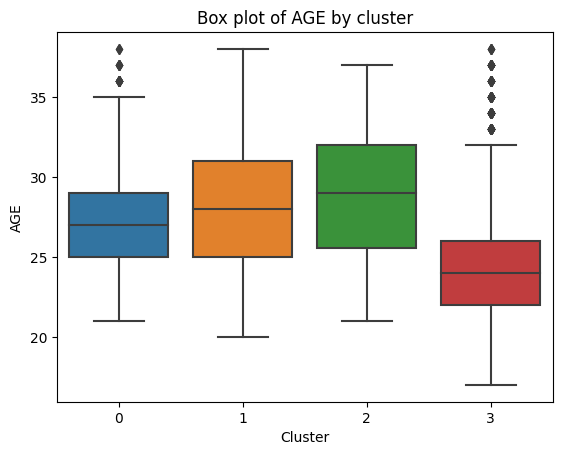

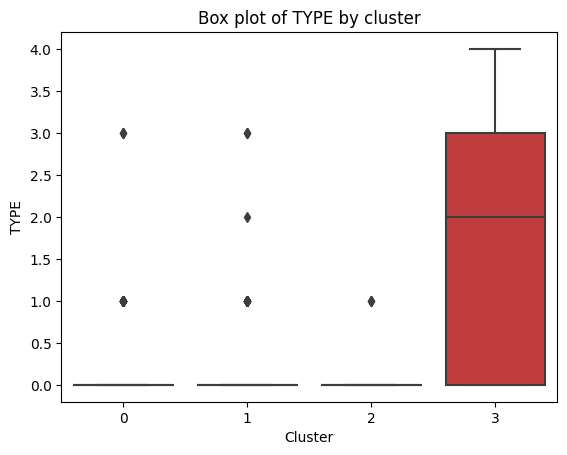

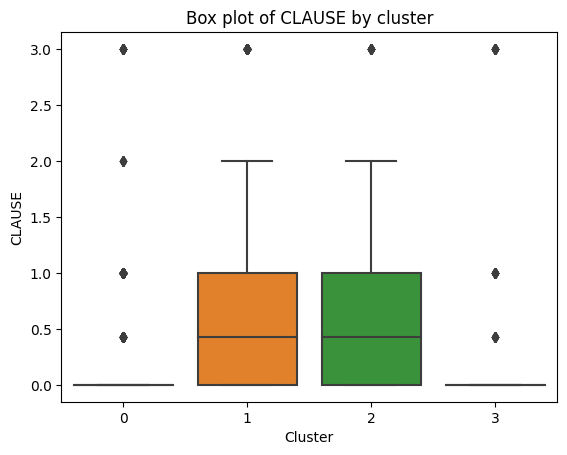

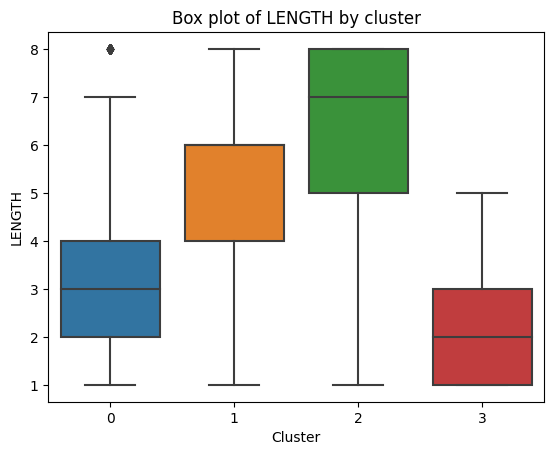

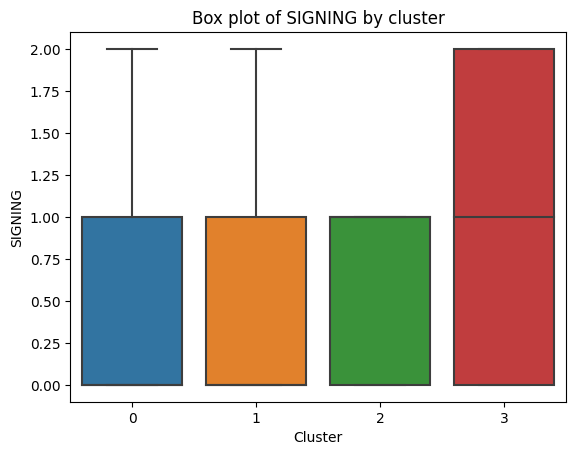

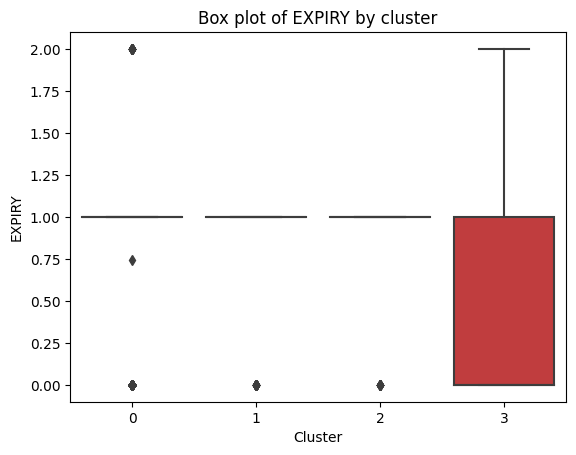

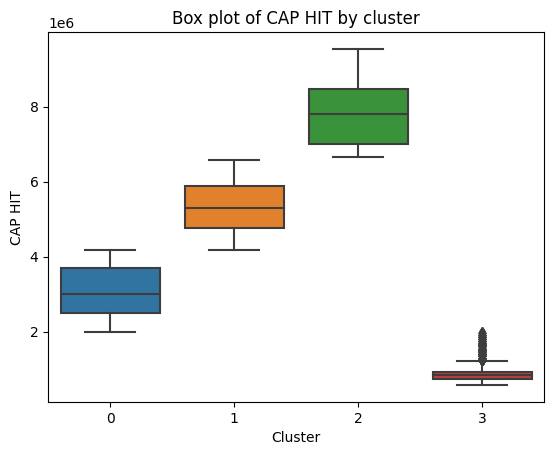

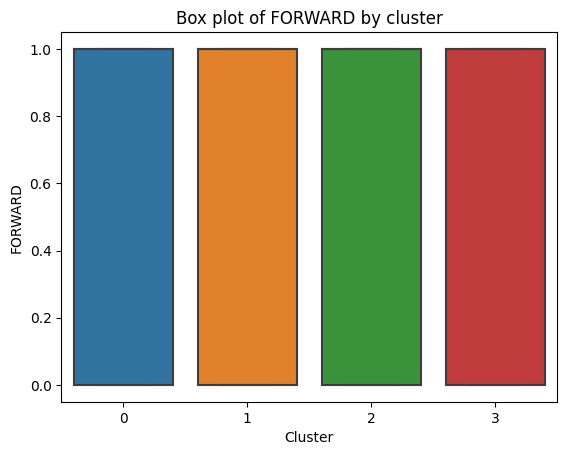

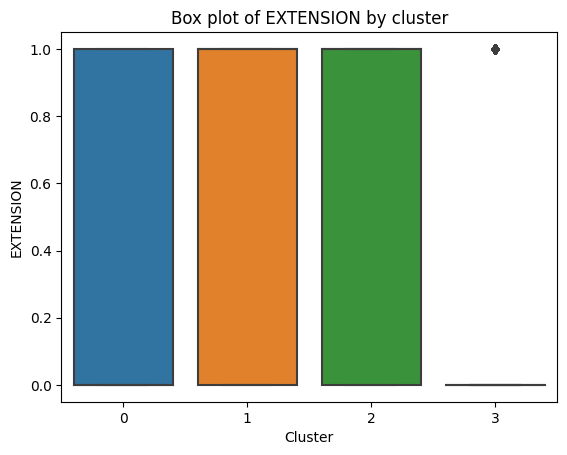

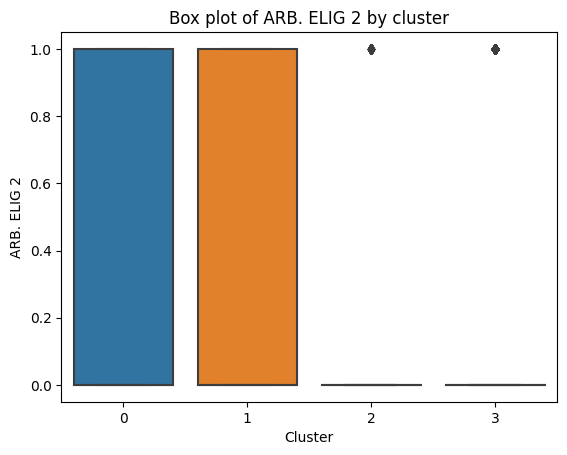

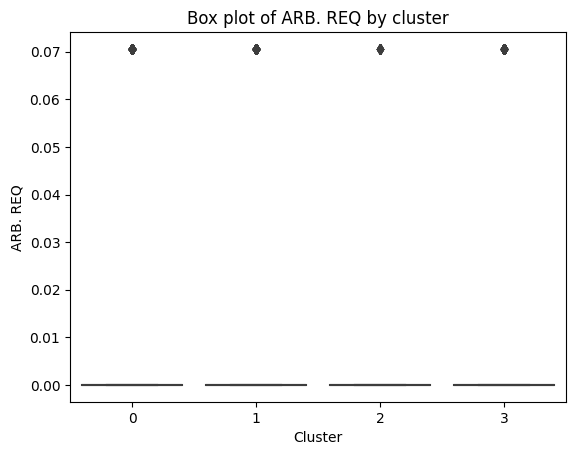

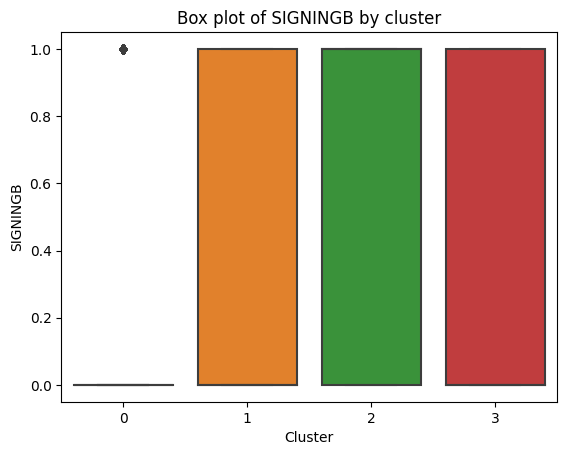

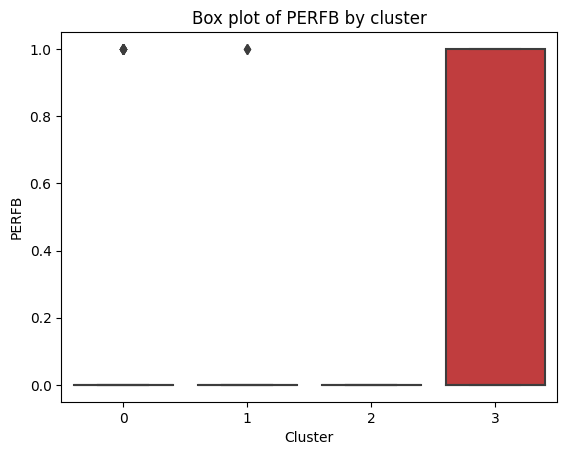

In [ ]:
import seaborn as sns

# Assume you have a dataframe `df` with the cluster assignments in a column `cluster`
# and the features you want to plot in separate columns

# Loop over each feature
for col in df_processed_cutted.columns[:-1]:
    # Create a box plot for the feature, colored by cluster
    sns.boxplot(x='cluster', y=col, data=df_processed_cutted)
    
    # Add a title and labels to the plot
    plt.title(f"Box plot of {col} by cluster")
    plt.xlabel("Cluster")
    plt.ylabel(col)
    
    # Show the plot
    plt.show()

In [ ]:
cluster_med = df_processed_cutted.groupby('cluster').median()
cluster_med = pd.DataFrame(cluster_med)

In [ ]:
med = cluster_med.T
pd.options.display.float_format = '{:.2f}'.format
med = pd.DataFrame(med)
med

cluster,0,1,2,3
AGE,27.00,28.00,29.00,24.00
TYPE,0.00,0.00,0.00,2.00
CLAUSE,0.00,0.43,0.43,0.00
LENGTH,3.00,6.00,7.00,2.00
SIGNING,0.00,0.00,1.00,1.00
EXPIRY,1.00,1.00,1.00,0.00
CAP HIT,3000000.00,5300000.00,7800000.00,850000.00
FORWARD,1.00,1.00,1.00,1.00
EXTENSION,0.00,1.00,1.00,0.00
ARB. ELIG 2,0.00,0.00,0.00,0.00


In [ ]:
variances = df_processed_cutted.groupby('cluster')['CAP HIT'].std()
variances = pd.DataFrame(variances)
variances

,CAP HIT
cluster,
0,663454.34
1,627370.15
2,866860.47
3,275315.20


In [ ]:
new = cluster_averages.T
pd.options.display.float_format = '{:.2f}'.format
new = pd.DataFrame(new)
new

cluster,0,1,2,3
AGE,27.25,28.07,28.80,24.22
TYPE,0.03,0.03,0.01,1.66
CLAUSE,0.22,0.71,0.62,0.02
LENGTH,3.60,5.29,6.46,2.12
SIGNING,0.44,0.44,0.59,1.11
EXPIRY,0.85,0.96,0.96,0.51
CAP HIT,3056230.82,5308702.69,7831134.06,899592.66
FORWARD,0.62,0.63,0.69,0.66
EXTENSION,0.40,0.53,0.61,0.21
ARB. ELIG 2,0.35,0.34,0.12,0.18


In [ ]:
cluster_final = df.copy()
cluster_final['cluster1'] = kms.labels_

In [ ]:
cluster_final

,PLAYER,FORWARD,AGE,DATE OF BIRTH,COUNTRY,WEIGHT,HEIGHT,POS,HANDED,DRAFTED,...,PERFB,PIM,TOI,BLK,HIT,FOW,FOL,POSITION,SEASON,cluster1
0,Connor McDavid,1,25.00,"Jan. 13, 1997",Canada,88,185,C,Left,1 - Round 1 - 2015 (EDM),...,0,36,1836,40,89,525,486,1,22,2
1,Artemi Panarin,1,30.00,"Oct. 30, 1991",Russia,77,180,LW,Right,-,...,0,36,1608,11,26,6,13,2,22,2
2,Auston Matthews,1,24.00,"Sep. 17, 1997",United States,100,191,C,Left,1 - Round 1 - 2016 (TOR),...,0,20,1501,92,78,550,499,1,22,2
3,John Tavares,1,31.00,"Sep. 20, 1990",Canada,98,185,"C, LW",Left,1 - Round 1 - 2009 (NYI),...,0,34,1413,36,112,726,519,1,22,2
4,Mitchell Marner,1,25.00,"May 5, 1997",Canada,79,183,RW,Right,4 - Round 1 - 2015 (TOR),...,0,28,1702,45,53,0,4,2,22,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5789,Rob O'Gara,0,22.00,"Jul. 6, 1993",United States,94,193,LD,Left,151 - Round 5 - 2011 (BOS),...,0,0,48,7,3,0,0,0,16,0
5790,Tim Heed,0,25.00,"Jan. 27, 1991",Sweden,82,180,RD,Right,132 - Round 5 - 2010 (ANA),...,0,0,16,2,0,0,0,0,16,0
5791,Anton Lindholm,0,21.00,"Nov. 29, 1994",Sweden,87,180,LD,Left,144 - Round 5 - 2014 (COL),...,1,2,177,12,38,0,0,0,16,0
5792,Erik Burgdoerfer,0,27.00,"Dec. 11, 1988",United States,94,185,RD,Right,-,...,0,0,22,0,5,0,0,0,16,0


# EDA и кластеризация по выступлениям

In [ ]:
selected_columns = ['AGE', 'FORWARD', 'GP', 'G', 'A', 'P', '+/-', 'Sh', 'TOI','BLK', 'HIT','iCF', 'PIM']

In [ ]:
df_processed = df[selected_columns].copy()

In [ ]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5794 entries, 0 to 5793
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AGE      5794 non-null   float64
 1   FORWARD  5794 non-null   int64  
 2   GP       5794 non-null   int64  
 3   G        5794 non-null   int64  
 4   A        5794 non-null   int64  
 5   P        5794 non-null   int64  
 6   +/-      5794 non-null   int64  
 7   Sh       5794 non-null   int64  
 8   TOI      5794 non-null   int64  
 9   BLK      5794 non-null   int64  
 10  HIT      5794 non-null   int64  
 11  iCF      5794 non-null   int64  
 12  PIM      5794 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 588.6 KB


In [ ]:
binary_columns, non_binary_columns = separate_columns(df_processed, selected_columns)

In [ ]:
clusterization_dict['apperances_clustering'] = [binary_columns, non_binary_columns]

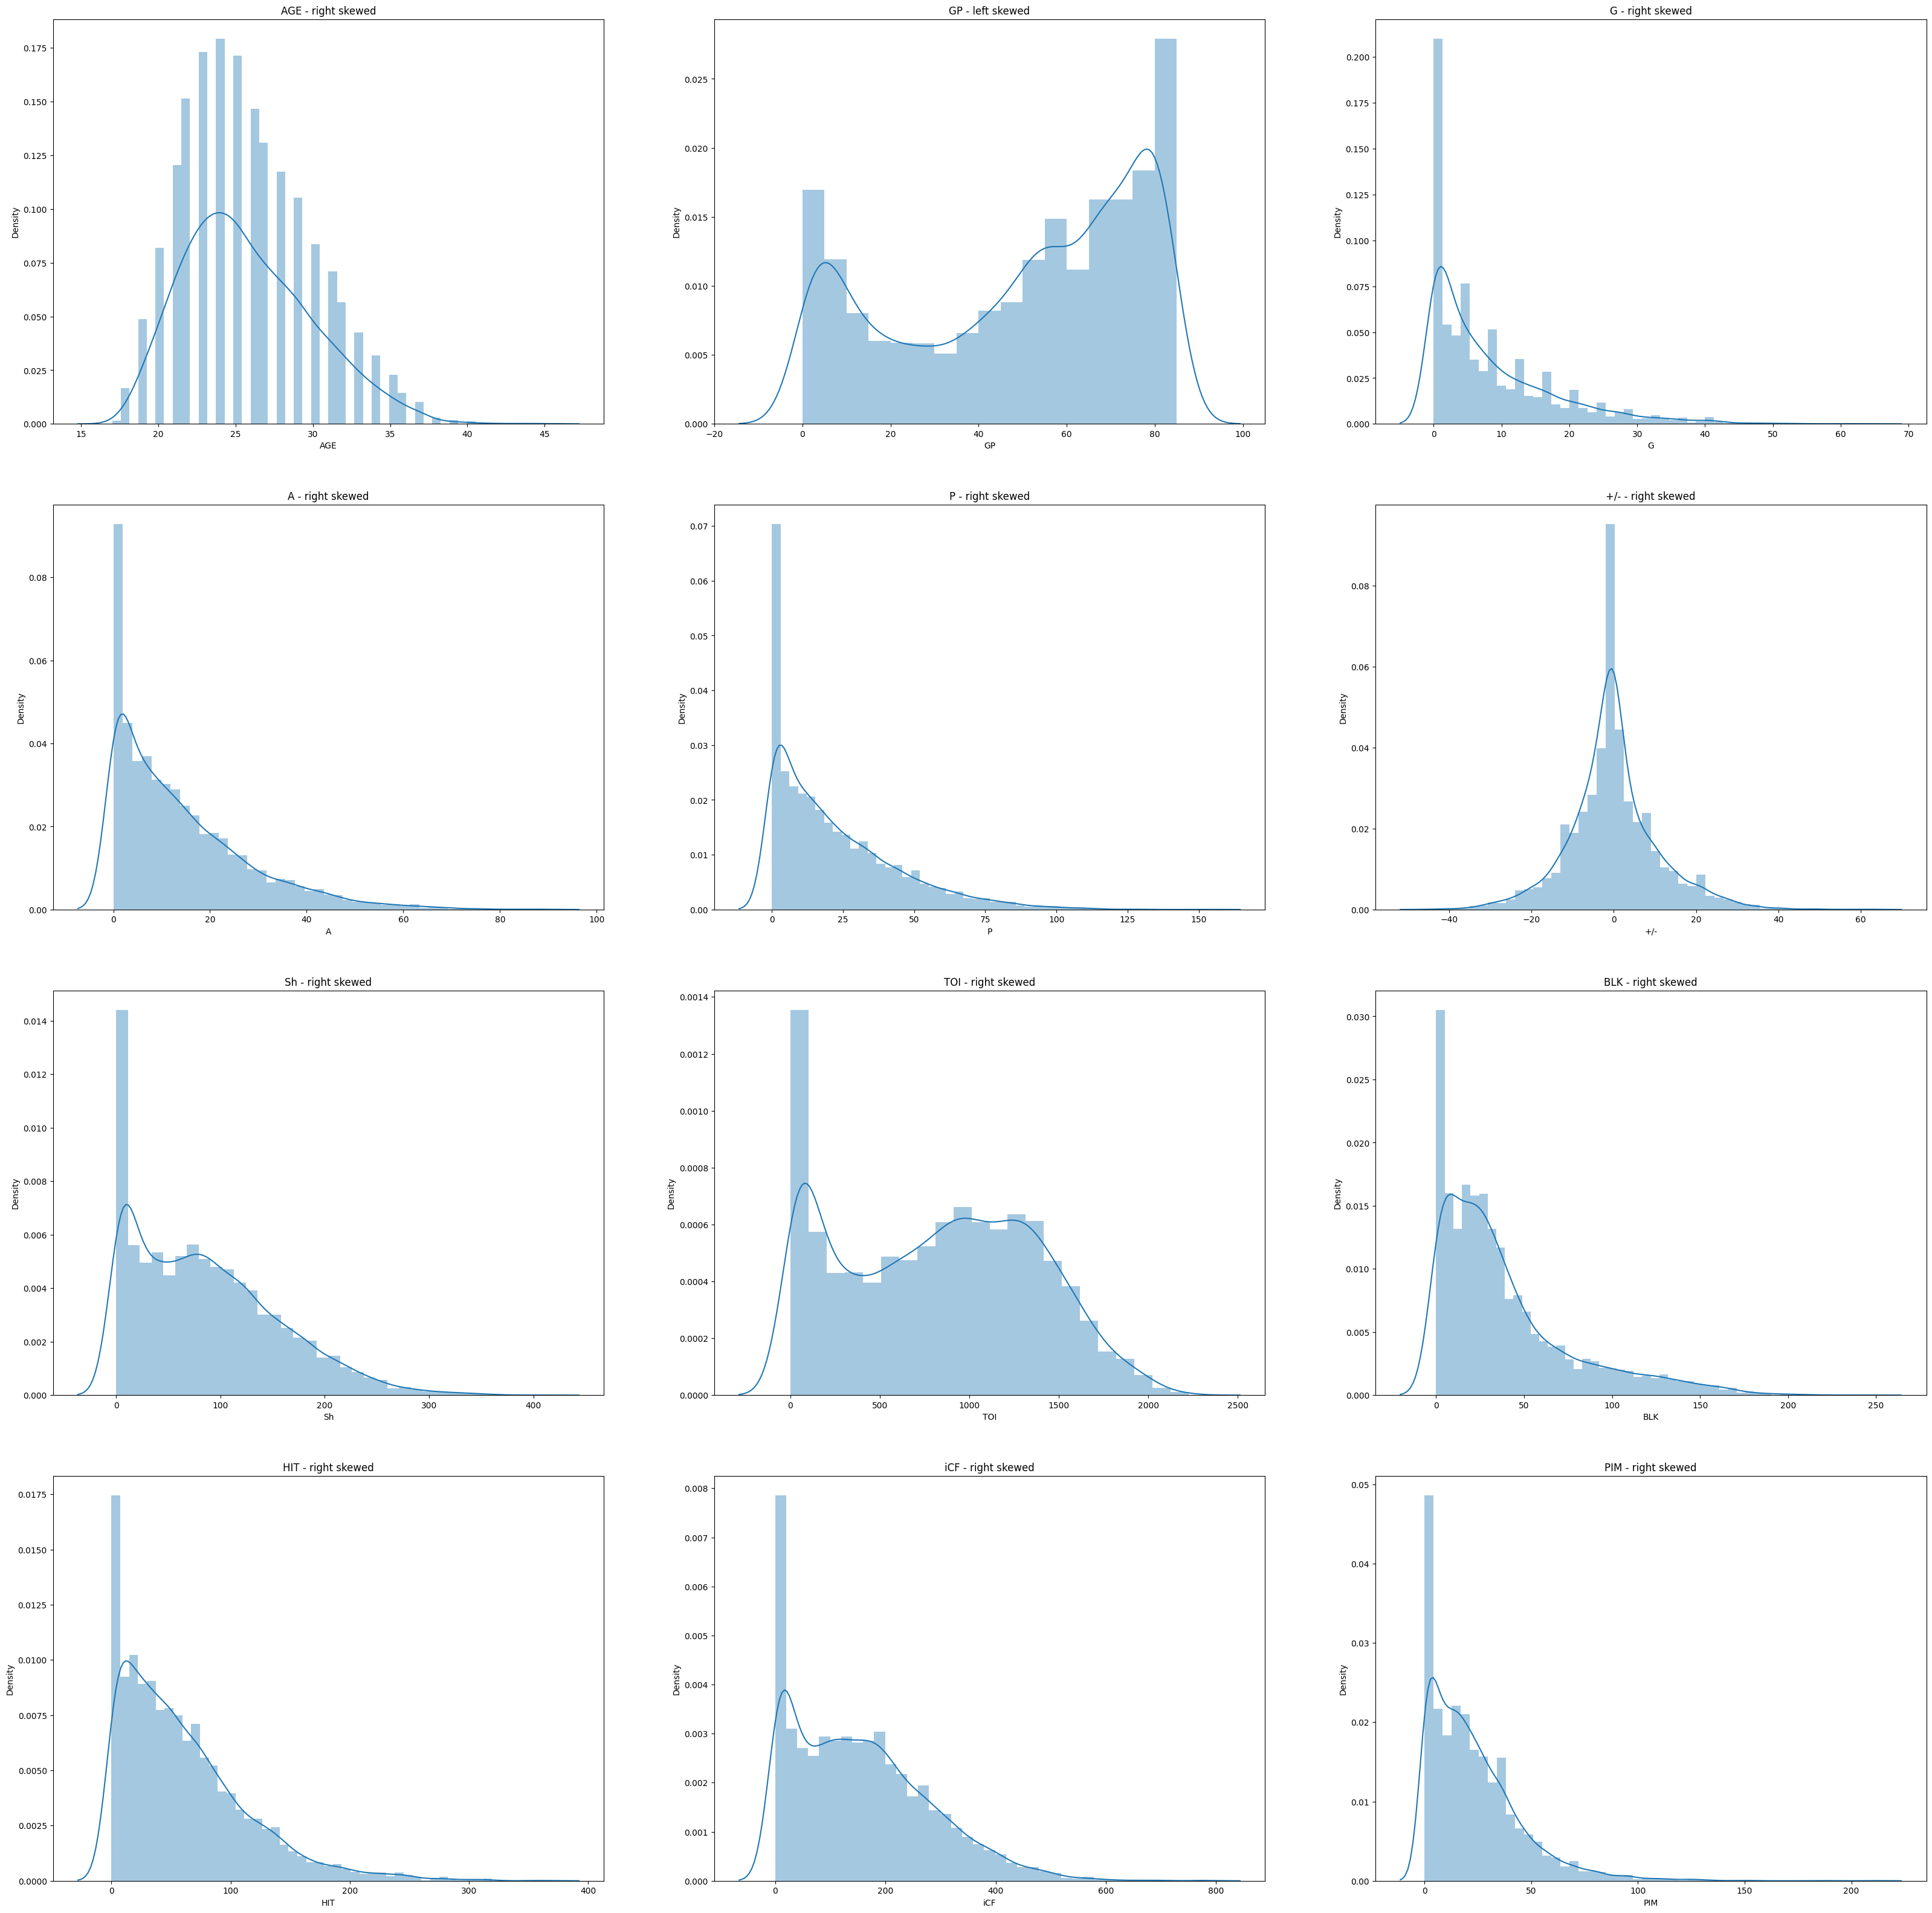

In [ ]:
try:
    plot_numeric_distributions(df_processed, non_binary_columns)
except Exception as e:
    print(e)


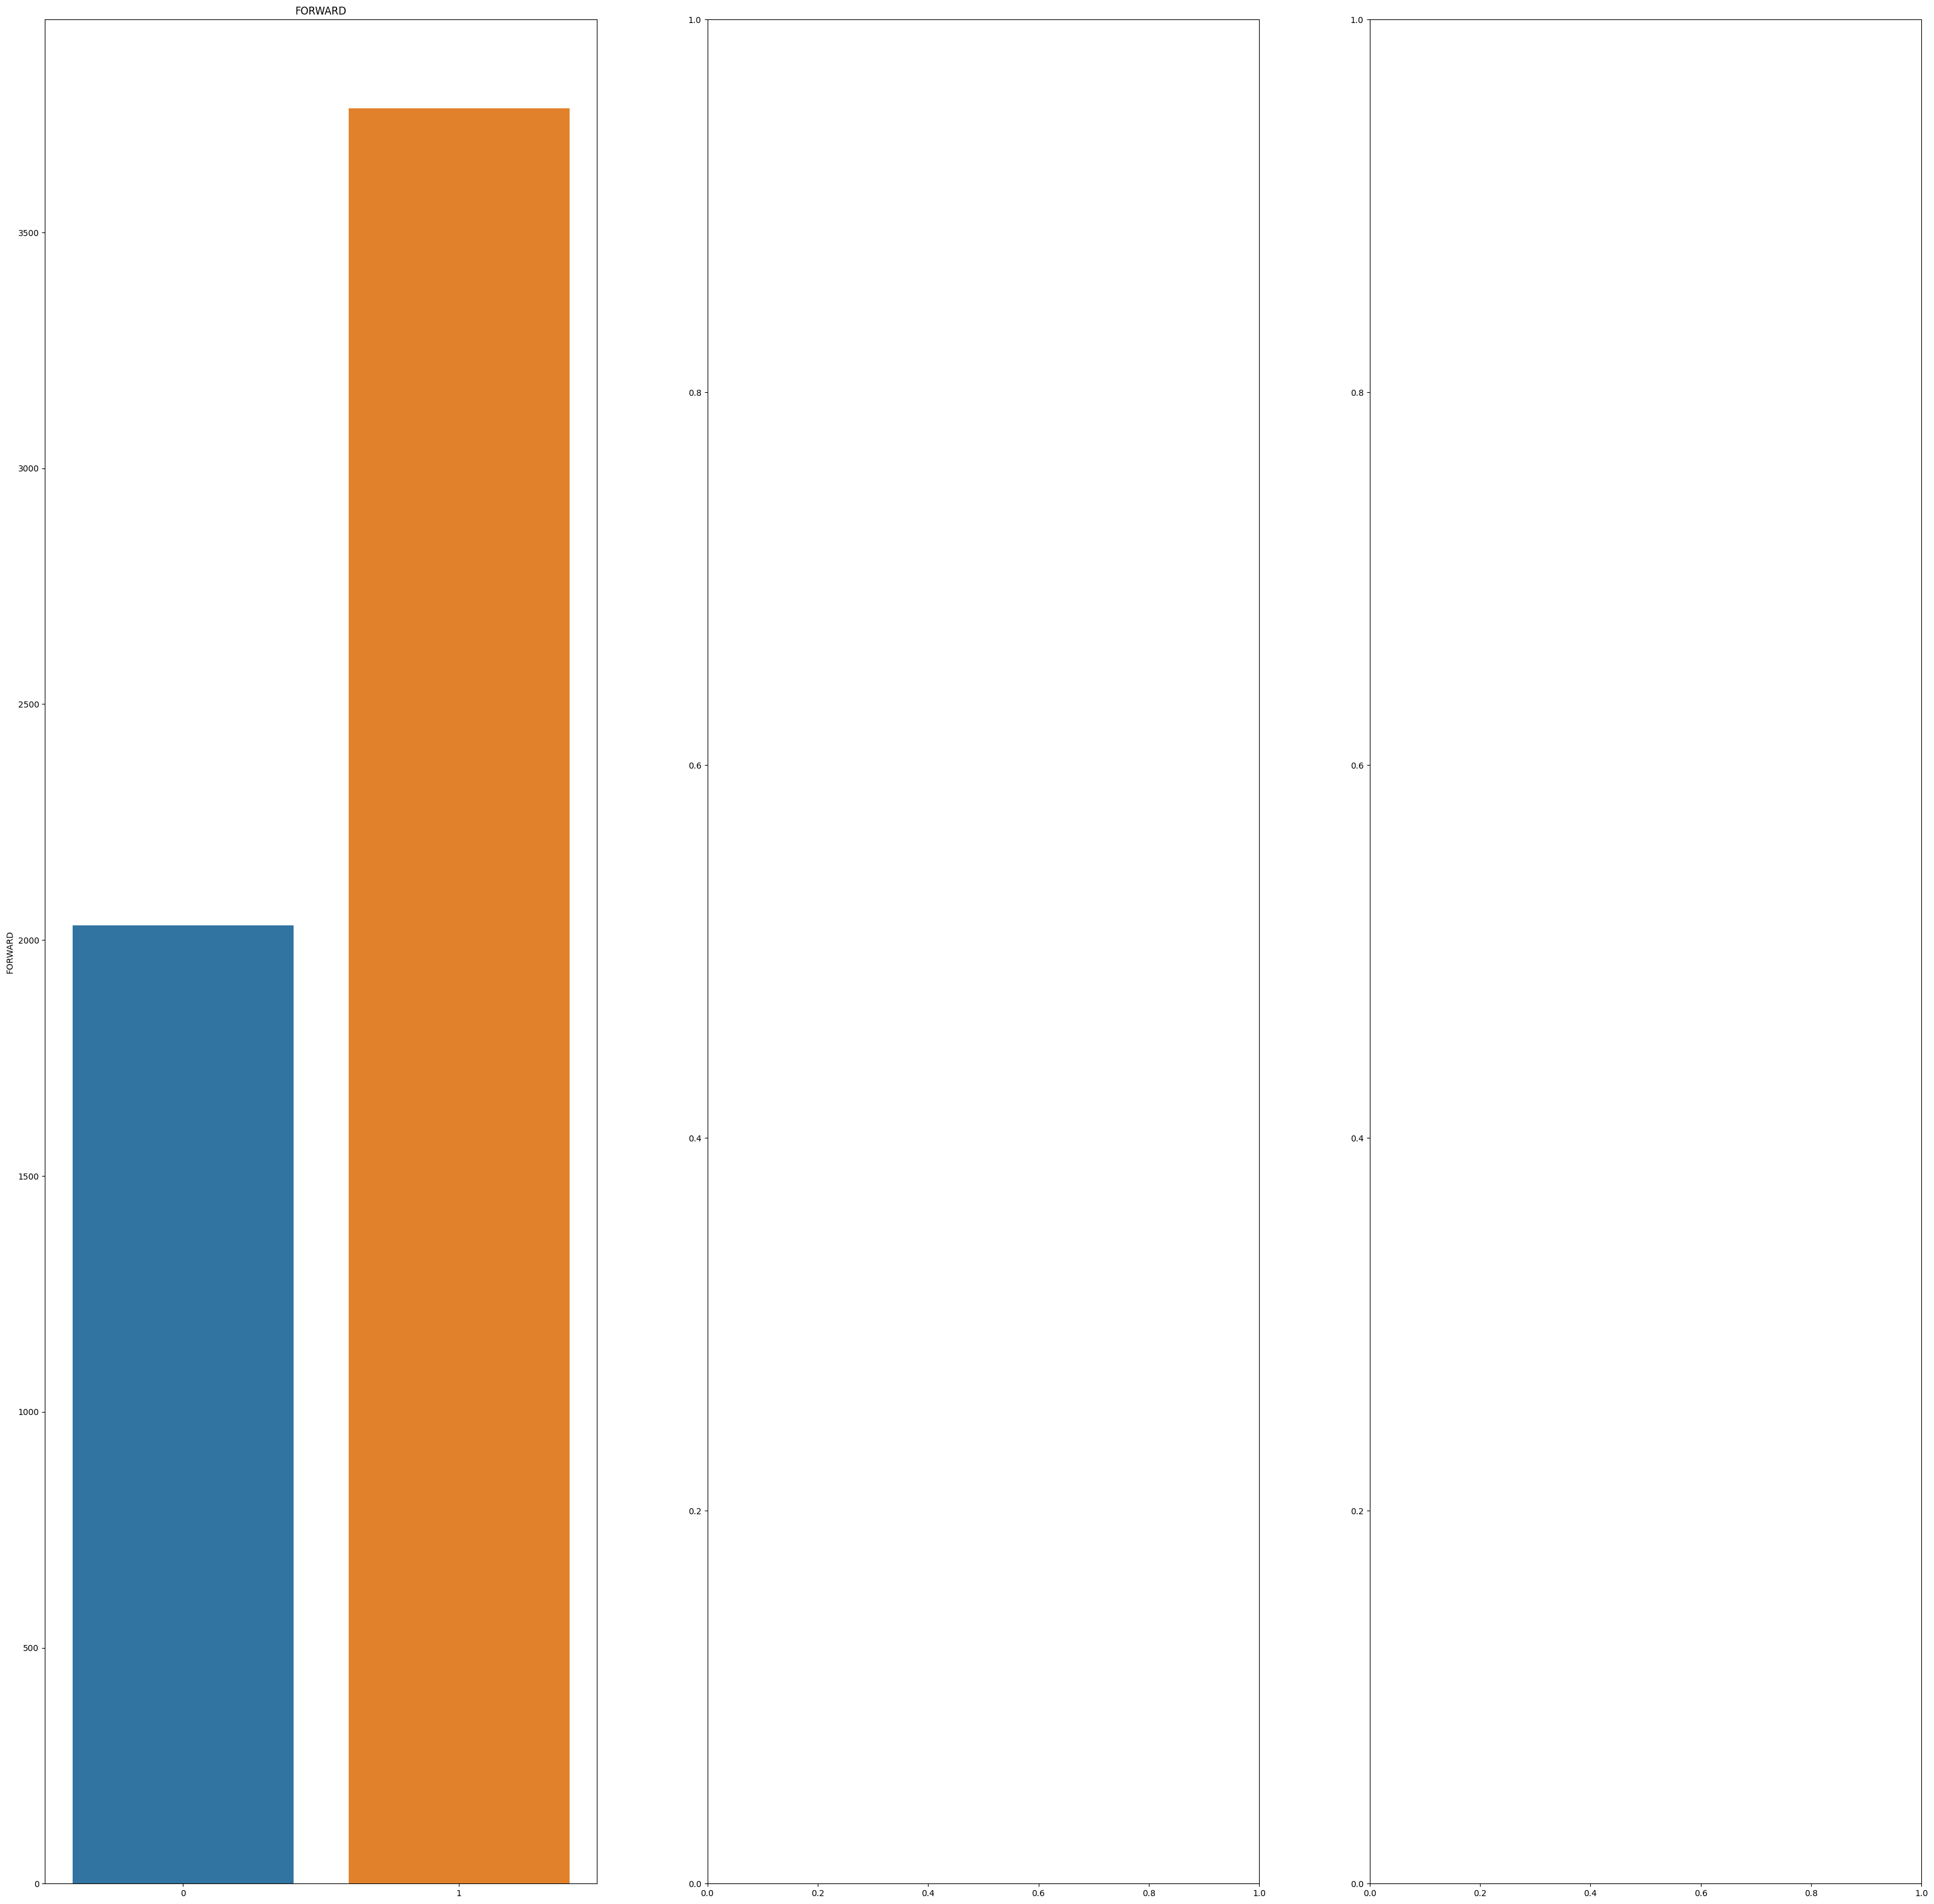

In [ ]:
try:
    plot_binary_distributions(df_processed, binary_columns)
except Exception as e:
    print(e)


In [ ]:
get_missing_values(df_processed)

,Count,Percent
AGE,0,0.0%
FORWARD,0,0.0%
GP,0,0.0%
G,0,0.0%
A,0,0.0%
P,0,0.0%
+/-,0,0.0%
Sh,0,0.0%
TOI,0,0.0%
BLK,0,0.0%


In [ ]:
df_processed = preprocess_data(df_processed, non_binary_columns+binary_columns)

In [ ]:
data = df_processed.copy()

In [ ]:
# Обычно заполнение отсутствующих средних значений используется, когда данные нормально распределены и отсутствующих значений мало по отношению к общему количеству данных. В этом случае недостающее значение может быть заменено средним значением всех остальных значений, что является хорошим способом сохранить статистические характеристики данных.

# Медиана, с другой стороны, используется для заполнения недостающих значений, когда данные перекошены или когда есть большие значения, которые отклоняются от остальных. В этом случае среднее значение может быть сильно искажено, тогда как медиана более устойчива к таким искажениям.

In [ ]:
alpha = 0.05 #p-value
per_threshold  = 0.1
outlier_threshold = 0.1 #percent of outliers
for col in data.select_dtypes(include=['number']).columns:
    p, k2 = stats.normaltest(data[col])
    num_isna = data[col].isna().sum()
    num_all = len(data[col])
    percent_nan = num_isna/num_all*100
    outlier_num = len(data[col][np.abs(stats.zscore(data[col])) > 3])
    outlier_percent = outlier_num/num_all*100
    if p > alpha and percent_nan < per_threshold and outlier_percent < outlier_threshold:
        data[col] = data[col].fillna(data[col].mean())
    else:
        data[col] = data[col].fillna(data[col].median())



In [ ]:
for col in df_processed.select_dtypes(include=['number']).columns:
    df_processed_cutted = cut_data(data, col)


In [ ]:

X = df_processed_cutted.copy()
clusterization_dict['X_processed_apperances'] = df_processed_cutted.copy()

Optimal number of clusters: 4


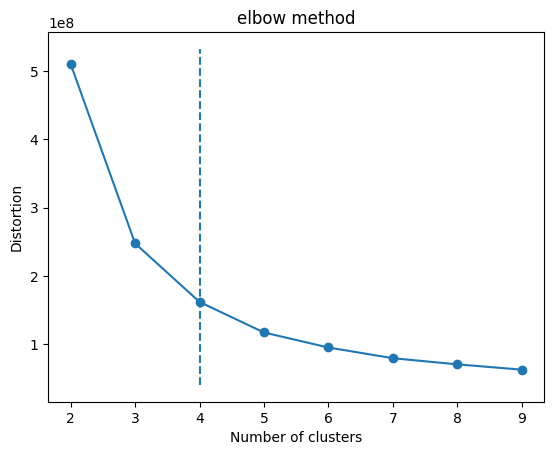

In [ ]:
cluster_df, k = clustering_metrics_kmeans(X, X.columns, max_number_cluster=10, title="elbow method")


In [ ]:
cluster_df

,Number of Clusters,Distortion,Calinski-Harabasz Score,Davies-Bouldin Score,Silhouette Score
0,2,510048544.63,14930.35,0.54,0.60
1,3,247477291.88,18455.17,0.60,0.55
2,4,161794547.35,19837.85,0.66,0.50
3,5,117056939.13,21115.13,0.70,0.48
4,6,95077991.17,21060.91,0.73,0.45
5,7,79386889.85,21205.99,0.79,0.43
6,8,70386476.86,20603.34,0.87,0.41
7,9,62616999.63,20350.84,0.85,0.41


In [ ]:
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
df_processed_cutted['cluster2'] = kmeans.labels_

<Axes: title={'center': 'Cluster distribution'}, xlabel='cluster2', ylabel='count'>

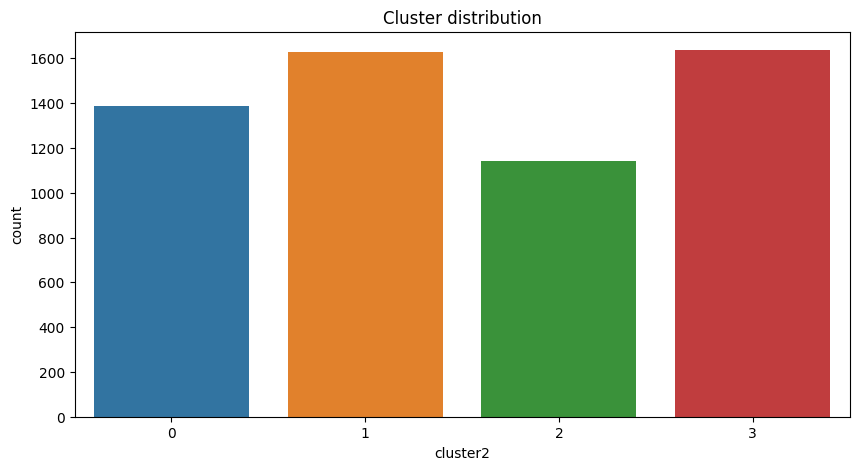

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Cluster distribution')
sns.countplot(x='cluster2', data=df_processed_cutted)

In [ ]:
kms = KMeansInterp(
    n_clusters=k,
    ordered_feature_names=X.columns,
    feature_importance_method='unsup2sup')


In [ ]:
kms.fit(X)


KMeansInterp(feature_importance_method='unsup2sup',
             ordered_feature_names=Index(['AGE', 'GP', 'G', 'A', 'P', '+/-', 'Sh', 'TOI', 'BLK', 'HIT', 'iCF',
       'PIM', 'FORWARD'],
      dtype='object'))

In [ ]:
df_processed_cutted['cluster2'] = kmeans.labels_
df_processed_cutted

,AGE,GP,G,A,P,+/-,Sh,TOI,BLK,HIT,iCF,PIM,FORWARD,cluster2
0,25.00,82,8.30,13.96,22.26,22.00,86.55,1836,40.00,89.00,495.00,36.00,1,2
1,30.00,82,29.00,13.96,22.26,4.00,204.00,1608,11.00,26.00,402.00,36.00,1,2
2,24.00,74,8.30,45.00,85.00,31.00,86.55,1501,92.00,78.00,526.00,20.00,1,2
3,31.00,80,36.00,44.00,80.00,-7.00,277.00,1413,36.00,112.00,428.00,34.00,1,2
4,25.00,80,30.00,13.96,22.26,18.00,196.00,1702,45.00,53.00,372.00,28.00,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5789,22.00,3,0.00,0.00,0.00,1.00,2.00,48,7.00,3.00,3.00,0.00,0,1
5790,25.00,1,0.00,0.00,0.00,0.00,1.00,16,2.00,0.00,4.00,0.00,0,1
5791,21.00,12,0.00,0.00,0.00,-8.00,7.00,177,12.00,38.00,22.00,2.00,0,1
5792,27.00,2,0.00,0.00,0.00,-1.00,2.00,22,0.00,5.00,3.00,0.00,0,1


In [ ]:
km_importances = pd.DataFrame(kms.feature_importances_)
km_importances

,0,1,2,3
0,"(TOI, 0.4662622106440635)","(TOI, 0.5319253039766692)","(TOI, 0.31445262926782047)","(TOI, 0.5489669256884927)"
1,"(iCF, 0.13640354694070708)","(GP, 0.11690091955644219)","(GP, 0.18612395658498898)","(iCF, 0.10065369707165008)"
2,"(GP, 0.13211553860850747)","(iCF, 0.11400113598660984)","(iCF, 0.17873431807705706)","(GP, 0.0856874557696865)"
3,"(Sh, 0.08582877081070889)","(Sh, 0.06864202567574888)","(Sh, 0.08326805233768218)","(Sh, 0.07177536334189565)"
4,"(BLK, 0.05126372565046267)","(A, 0.04980501944078605)","(P, 0.072615399498152)","(BLK, 0.051762887186214926)"
5,"(P, 0.05007429483393045)","(BLK, 0.04849746894956566)","(BLK, 0.06174192888089121)","(A, 0.040864030210044394)"
6,"(A, 0.03361496044440234)","(FORWARD, 0.019010706471904348)","(A, 0.04844104437415389)","(P, 0.03491092635851727)"
7,"(HIT, 0.011219193415452269)","(P, 0.01831405204561941)","(PIM, 0.039690444290622115)","(G, 0.02144575464429496)"
8,"(PIM, 0.009801077276586596)","(G, 0.011475783821908796)","(HIT, 0.00803446408186717)","(FORWARD, 0.012395900321409808)"
9,"(FORWARD, 0.008098776266160783)","(PIM, 0.008079589217263781)","(G, 0.002385309942341691)","(PIM, 0.01027273105519141)"


In [ ]:
cluster_averages = df_processed_cutted.groupby('cluster2').mean()
cluster_averages = pd.DataFrame(cluster_averages)

In [ ]:
new = cluster_averages.T
pd.options.display.float_format = '{:.2f}'.format
new = pd.DataFrame(new)
new

cluster2,0,1,2,3
AGE,25.96,24.15,26.61,26.49
GP,48.91,12.21,77.02,67.47
G,5.66,0.93,13.84,12.01
A,8.58,1.53,27.87,18.59
P,14.27,2.46,42.98,30.80
+/-,-2.26,-1.03,1.91,0.28
Sh,64.81,13.09,162.38,119.46
TOI,663.77,142.95,1573.21,1114.86
BLK,30.49,6.68,71.71,48.16
HIT,65.46,16.17,82.54,75.91


In [ ]:
cluster_std = df_processed_cutted.groupby('cluster2').std()
cluster_std = pd.DataFrame(cluster_std)
cluster_std

,AGE,GP,G,A,P,+/-,Sh,TOI,BLK,HIT,iCF,PIM,FORWARD
cluster2,,,,,,,,,,,,,
0,4.02,12.13,4.27,5.22,8.47,8.43,27.13,140.27,17.53,41.22,43.55,15.64,0.46
1,3.73,10.21,1.53,1.98,3.06,3.33,13.02,118.08,7.49,20.00,22.99,9.72,0.47
2,4.06,6.58,9.65,12.00,20.36,14.29,56.59,183.01,40.74,45.65,94.22,16.88,0.50
3,4.12,10.06,7.61,8.97,14.81,12.10,40.76,133.36,28.09,44.46,64.87,16.24,0.45


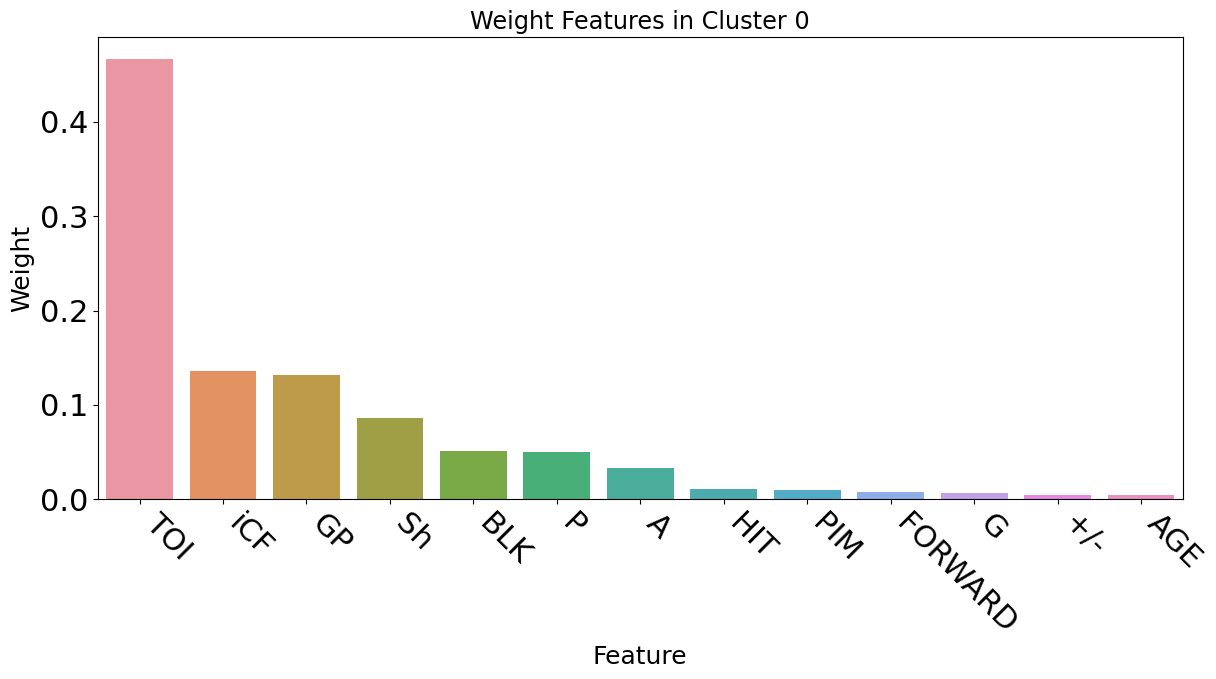

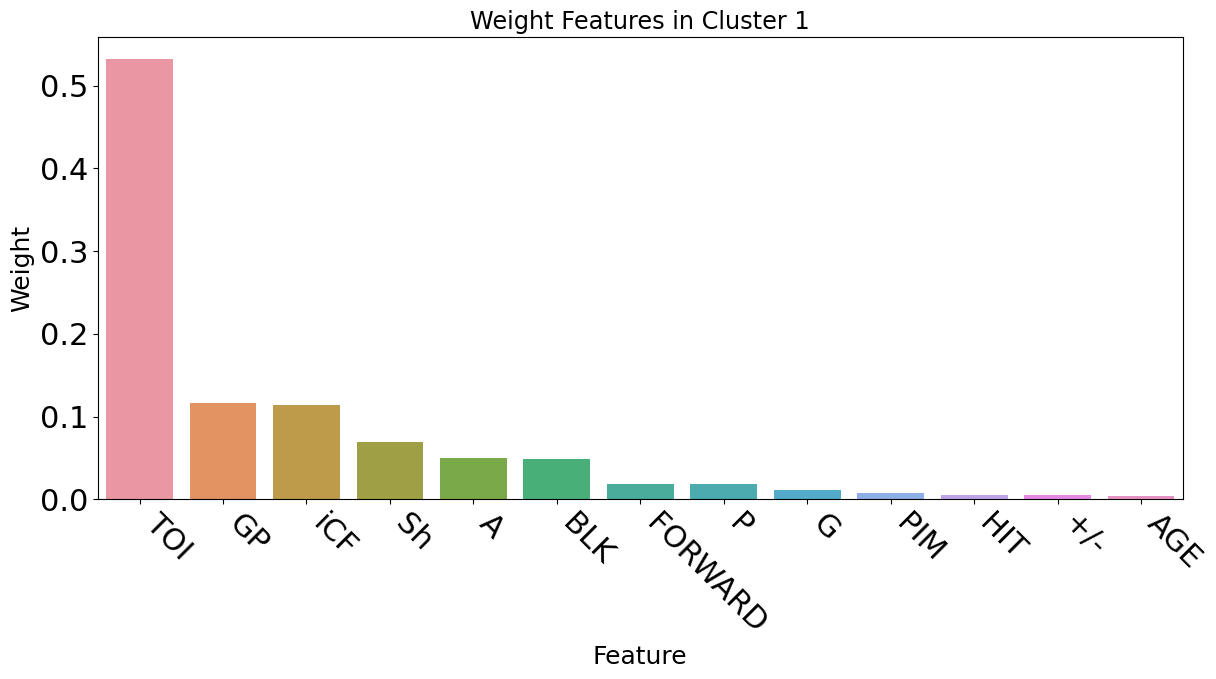

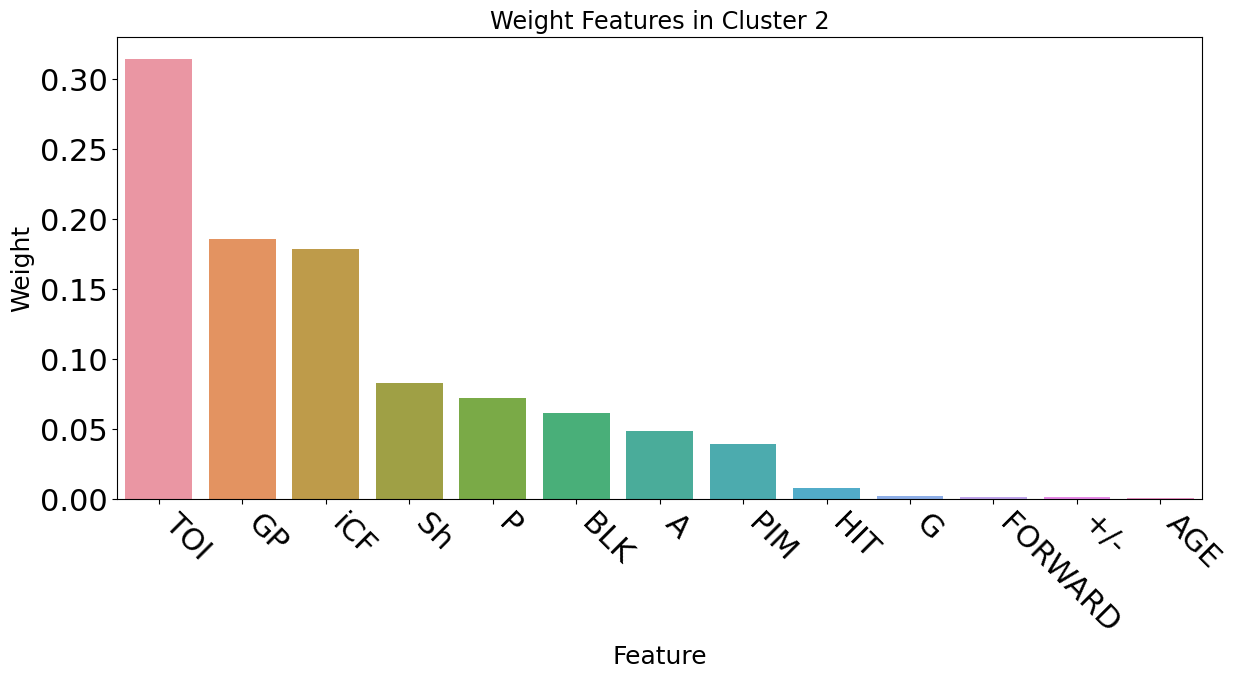

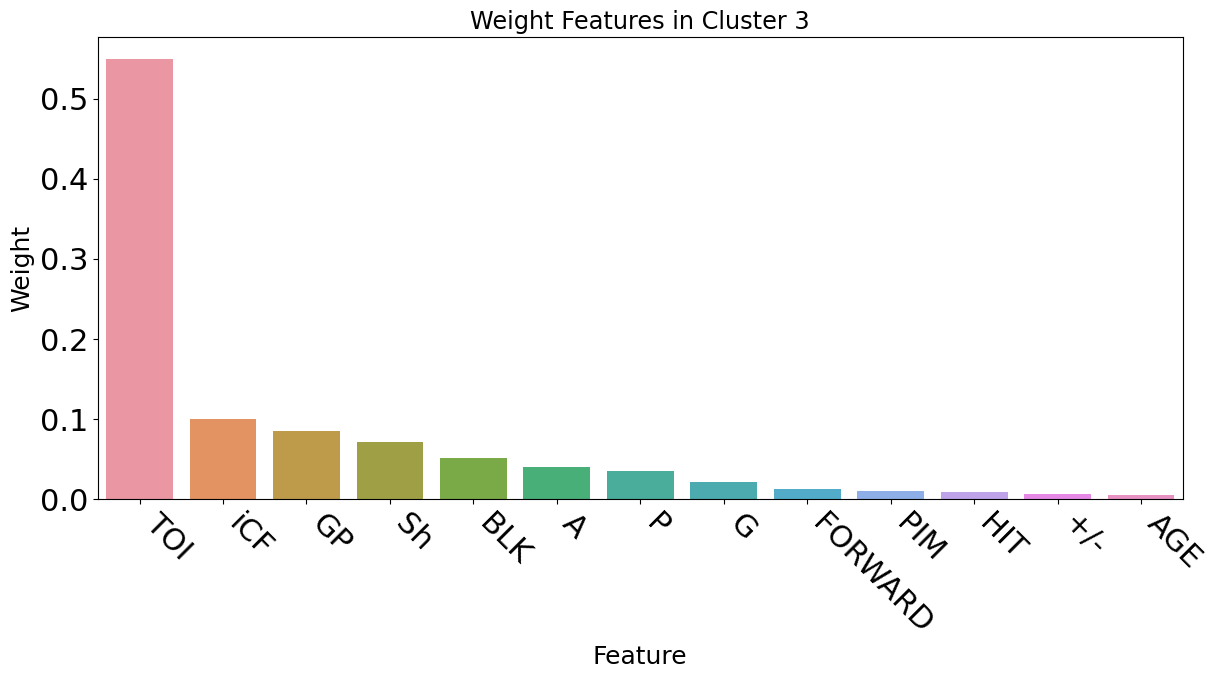

In [ ]:
for cluster_label, feature_weights in kms.feature_importances_.items():    
    df_feature_weight = pd.DataFrame(feature_weights[:15], columns=["Feature", "Weight"])
    fig, ax = plt.subplots(figsize=(14,6))
    sns.barplot(x="Feature", y="Weight", data=df_feature_weight)
    plt.xticks(rotation=-45, ha="left");
    ax.tick_params(axis='both', which='major', labelsize=22)
    plt.title(f'Weight Features in Cluster {cluster_label}', fontsize='xx-large')
    plt.xlabel('Feature', fontsize=18)
    plt.ylabel('Weight', fontsize=18)

    plt.show();

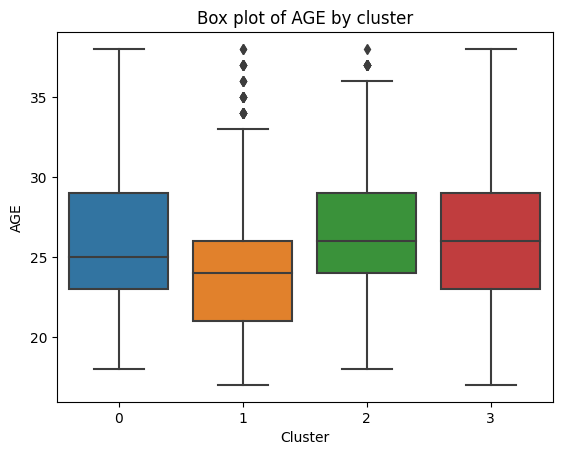

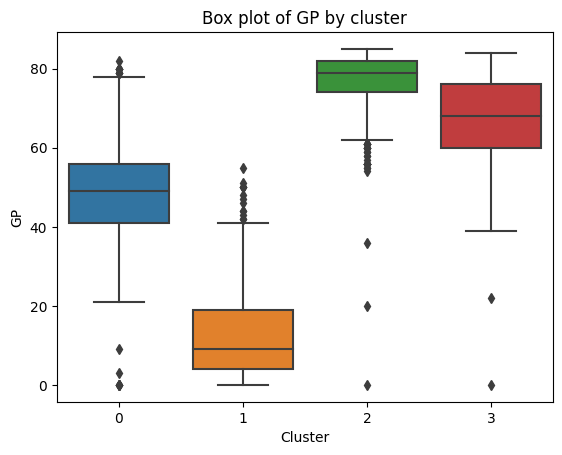

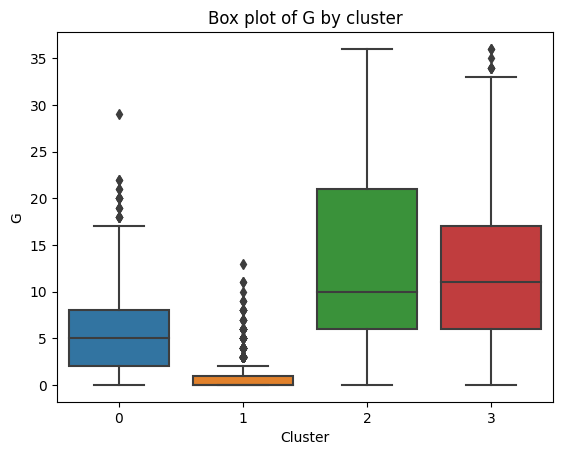

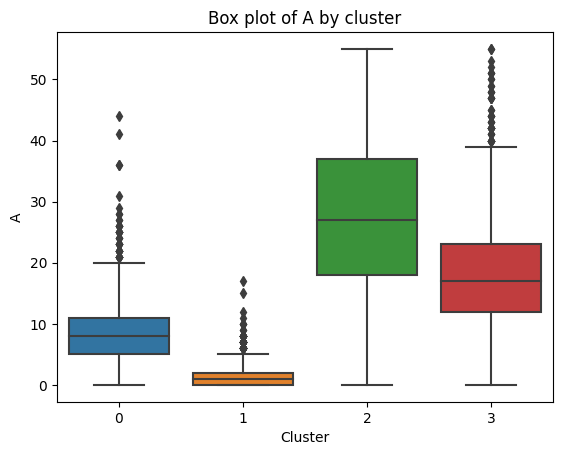

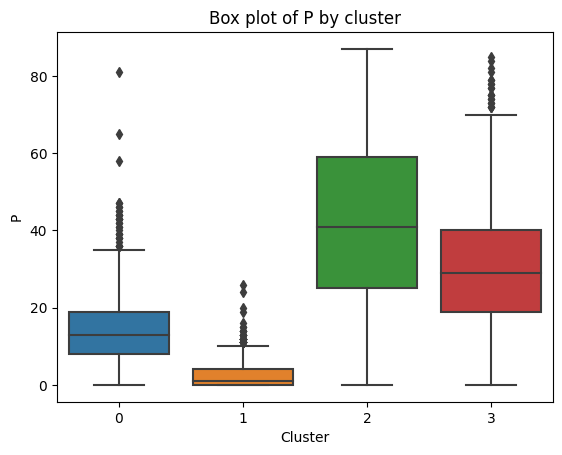

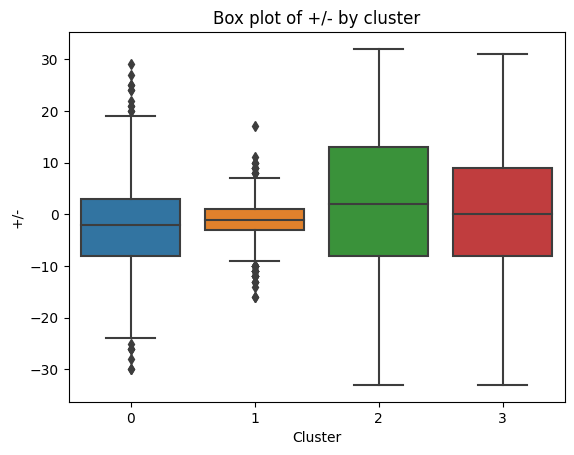

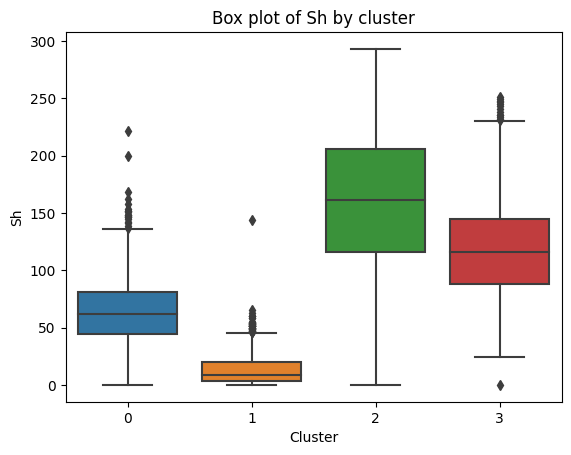

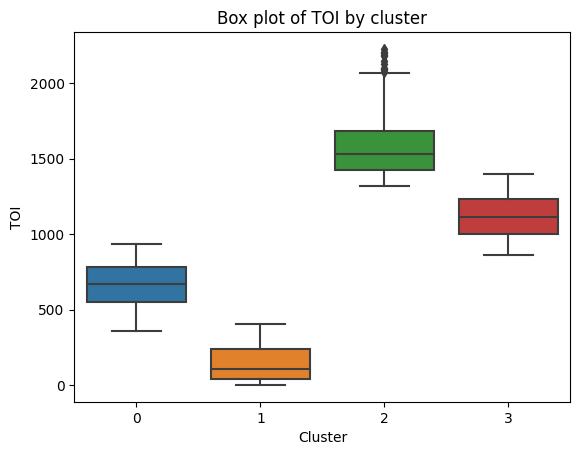

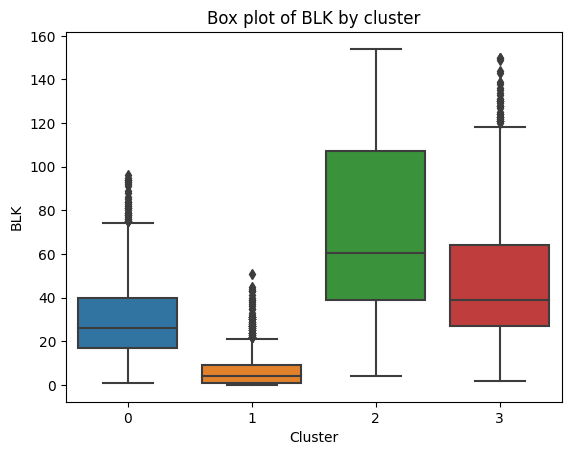

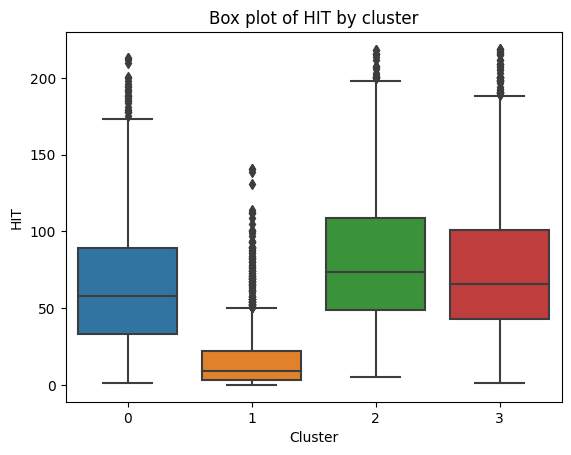

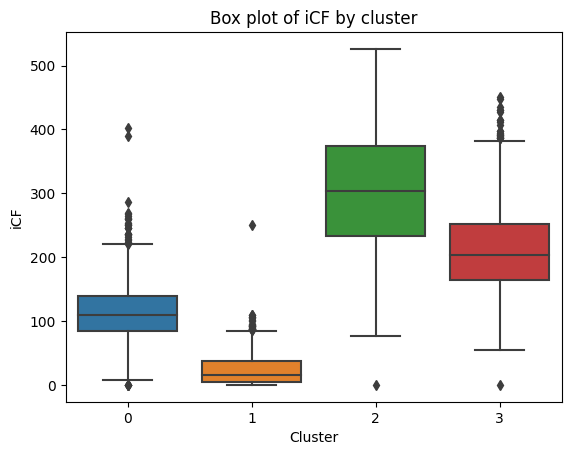

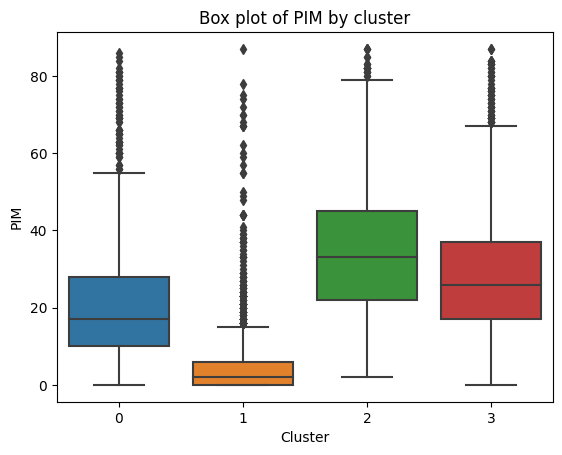

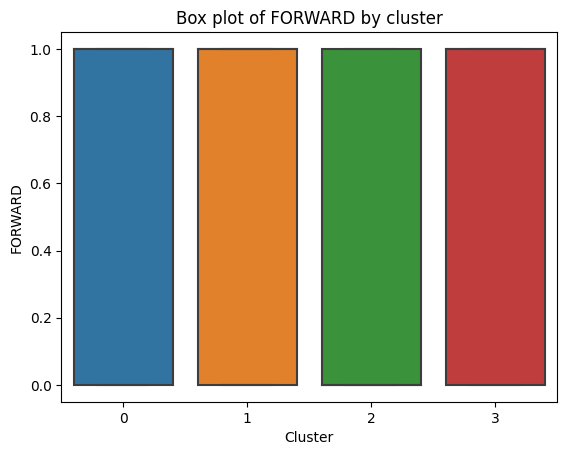

In [ ]:
import seaborn as sns

# Assume you have a dataframe df with the cluster assignments in a column cluster
# and the features you want to plot in separate columns

# Loop over each feature
for col in df_processed_cutted.columns[:-1]:
    # Create a box plot for the feature, colored by cluster
    sns.boxplot(x='cluster2', y=col, data=df_processed_cutted)
    
    # Add a title and labels to the plot
    plt.title(f"Box plot of {col} by cluster")
    plt.xlabel("Cluster")
    plt.ylabel(col)
    
    # Show the plot
    plt.show()

In [ ]:
cluster_final['cluster2'] = df_processed_cutted['cluster2']
cluster_final

,PLAYER,FORWARD,AGE,DATE OF BIRTH,COUNTRY,WEIGHT,HEIGHT,POS,HANDED,DRAFTED,...,BLK,HIT,FOW,FOL,POSITION,SEASON,cluster1,cluster2,contract,performance
0,Connor McDavid,1,25.00,"Jan. 13, 1997",Canada,88,185,C,Left,1 - Round 1 - 2015 (EDM),...,40,89,525,486,1,22,2,2,A,D
1,Artemi Panarin,1,30.00,"Oct. 30, 1991",Russia,77,180,LW,Right,-,...,11,26,6,13,2,22,2,2,A,D
2,Auston Matthews,1,24.00,"Sep. 17, 1997",United States,100,191,C,Left,1 - Round 1 - 2016 (TOR),...,92,78,550,499,1,22,2,2,A,D
3,John Tavares,1,31.00,"Sep. 20, 1990",Canada,98,185,"C, LW",Left,1 - Round 1 - 2009 (NYI),...,36,112,726,519,1,22,2,2,A,D
4,Mitchell Marner,1,25.00,"May 5, 1997",Canada,79,183,RW,Right,4 - Round 1 - 2015 (TOR),...,45,53,0,4,2,22,2,2,A,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5789,Rob O'Gara,0,22.00,"Jul. 6, 1993",United States,94,193,LD,Left,151 - Round 5 - 2011 (BOS),...,7,3,0,0,0,16,0,1,C,A
5790,Tim Heed,0,25.00,"Jan. 27, 1991",Sweden,82,180,RD,Right,132 - Round 5 - 2010 (ANA),...,2,0,0,0,0,16,0,1,C,A
5791,Anton Lindholm,0,21.00,"Nov. 29, 1994",Sweden,87,180,LD,Left,144 - Round 5 - 2014 (COL),...,12,38,0,0,0,16,0,1,C,A
5792,Erik Burgdoerfer,0,27.00,"Dec. 11, 1988",United States,94,185,RD,Right,-,...,0,5,0,0,0,16,0,1,C,A


In [ ]:
cluster_final.to_csv('cluster_final.csv')

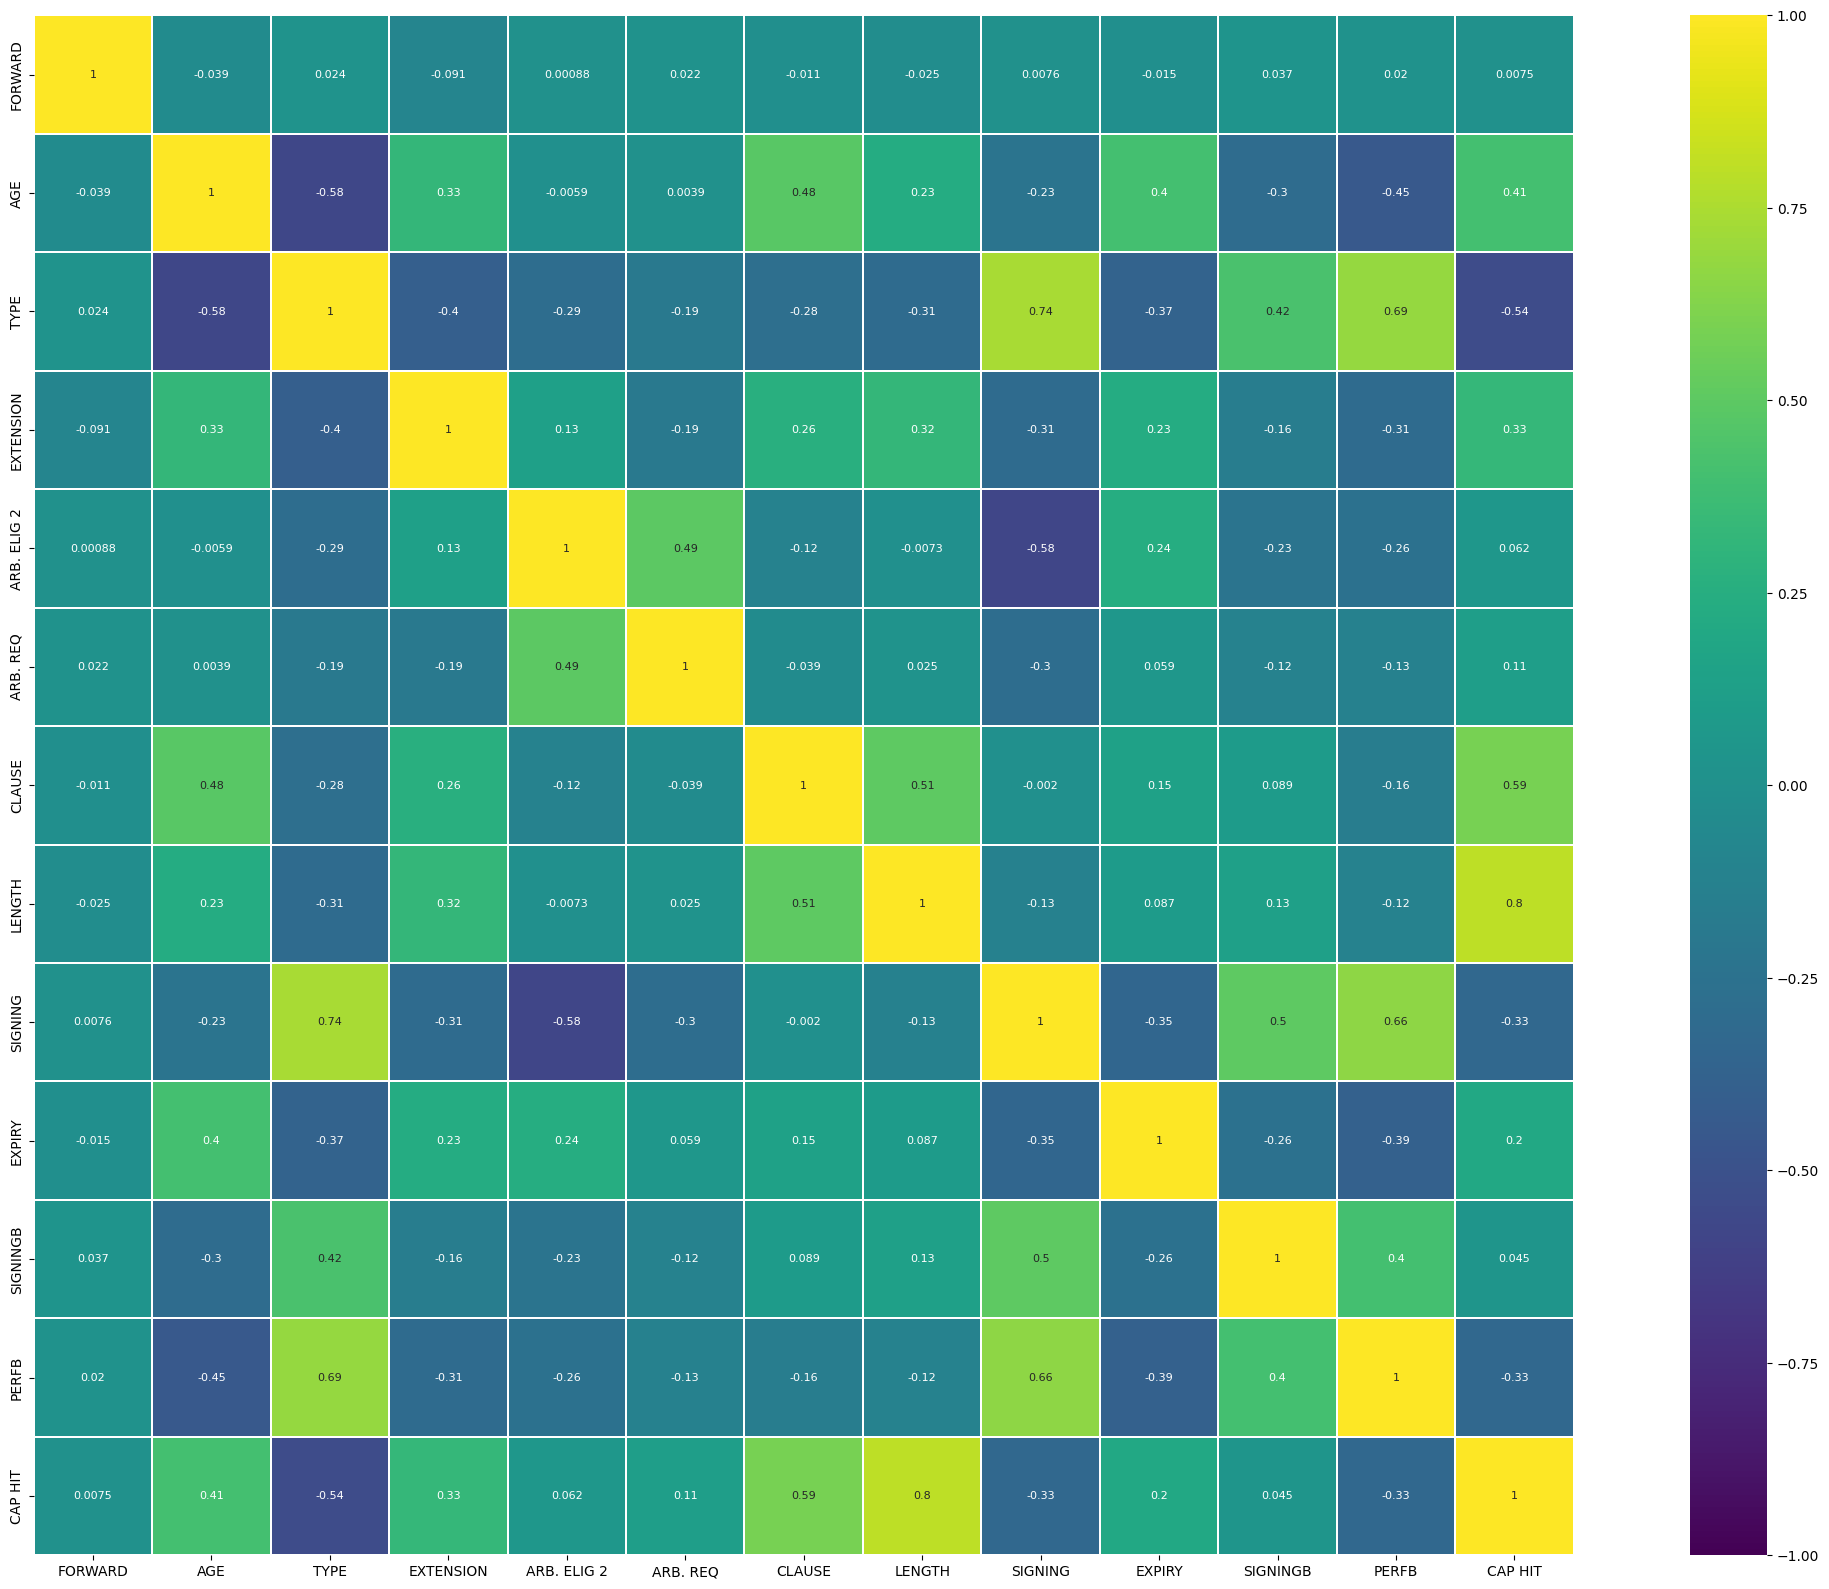

In [ ]:
n= cluster_final[['FORWARD', 'AGE', 'TYPE', 'EXTENSION',  'ARB. ELIG 2', 'ARB. REQ', 'CLAUSE', 'LENGTH', 'SIGNING', 'EXPIRY', 'SIGNINGB', 'PERFB', 'CAP HIT']]
corr = n.corr() 
plt.figure(figsize=(30, 20))

sns.heatmap( corr,
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [ ]:
cluster_final


,PLAYER,FORWARD,AGE,DATE OF BIRTH,COUNTRY,WEIGHT,HEIGHT,POS,HANDED,DRAFTED,...,PERFB,PIM,TOI,BLK,HIT,FOW,FOL,SEASON,cluster1,cluster2
0,Connor McDavid,1,25.00,"Jan. 13, 1997",Canada,88,185,C,Left,1 - Round 1 - 2015 (EDM),...,0,36,1836,40,89,525,486,22,2,3
1,Artemi Panarin,1,30.00,"Oct. 30, 1991",Russia,77,180,LW,Right,-,...,0,36,1608,11,26,6,13,22,2,1
2,Auston Matthews,1,24.00,"Sep. 17, 1997",United States,100,191,C,Left,1 - Round 1 - 2016 (TOR),...,0,20,1501,92,78,550,499,22,2,3
3,John Tavares,1,31.00,"Sep. 20, 1990",Canada,98,185,"C, LW",Left,1 - Round 1 - 2009 (NYI),...,0,34,1413,36,112,726,519,22,2,3
4,Mitchell Marner,1,25.00,"May 5, 1997",Canada,79,183,RW,Right,4 - Round 1 - 2015 (TOR),...,0,28,1702,45,53,0,4,22,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5789,Rob O'Gara,0,22.00,"Jul. 6, 1993",United States,94,193,LD,Left,151 - Round 5 - 2011 (BOS),...,0,0,48,7,3,0,0,16,0,0
5790,Tim Heed,0,25.00,"Jan. 27, 1991",Sweden,82,180,RD,Right,132 - Round 5 - 2010 (ANA),...,0,0,16,2,0,0,0,16,0,0
5791,Anton Lindholm,0,21.00,"Nov. 29, 1994",Sweden,87,180,LD,Left,144 - Round 5 - 2014 (COL),...,1,2,177,12,38,0,0,16,0,0
5792,Erik Burgdoerfer,0,27.00,"Dec. 11, 1988",United States,94,185,RD,Right,-,...,0,0,22,0,5,0,0,16,0,0


In [ ]:
# Посмотреть какие значения кластеров совпадают(т.е в контрактах 0 кластер например отражает топ игроков и в выступлении 0 кластер отражает топ игроков и если у одного игрока и в первом кластере и во втором кластере 0, то в третий столбик поставить значение 1, иначе значение 0 )
